In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
def check_string(df,field):
    for i in df.index:
        try:
            if "." in df.loc[i,field]:
                print("error")
        except:
            print("there is an int")

In [3]:
base_path="/Users/sijiawu/Work/Thesis/Data/Affiliations/"
data_base_path="/Users/sijiawu/Work/Thesis/Data/"

In [4]:
j_data=pd.read_pickle(data_base_path+"Combined/011_merged_proc_scopus_inception_2020.pkl")
relevant=pd.read_excel('../031_proc_refs_full_set/refs_1940_2020_top5.xlsx')

In [ ]:
relevant["id_o"]=relevant["id_o"].astype(str)
relevant["match_id"]=relevant["match_id"].astype(str)
j_data["id_o"]=j_data["URL"].str.split("/").str[-1]

In [21]:
relevant.head()

ref_ord     id_o  year_o  type author title journal year volume issue  ...  \
0        1  1884138    1960   8.0    NaN   NaN     NaN  NaN    NaN   NaN  ...   
1        1  1883059    1960   8.0    NaN   NaN     NaN  NaN    NaN   NaN  ...   
2        2  1882300    1957   8.0    NaN   NaN     NaN  NaN    NaN   NaN  ...   
3       10  1882300    1957   8.0    NaN   NaN     NaN  NaN    NaN   NaN  ...   
4        1  1882705    1965   8.0    NaN   NaN     NaN  NaN    NaN   NaN  ...   

  title_proc                             match_url outcome match_id    f_key  \
0       none  https://www.jstor.org/stable/1812343     NaN  1812343  mturk_0   
1       none  https://www.jstor.org/stable/1907805     NaN  1907805  mturk_1   
2       none  https://www.jstor.org/stable/1803057     NaN  1803057  mturk_2   
3       none  https://www.jstor.org/stable/1818330     NaN  1818330  mturk_3   
4       none  https://www.jstor.org/stable/1884206     NaN  1884206  mturk_4   

  authors month full_reference  status alt_j  
0     NaN   NaN            NaN     NaN   NaN  
1     NaN   NaN            NaN     NaN   NaN  
2     NaN   NaN            NaN     NaN   NaN  
3     NaN   NaN            NaN     NaN   NaN  
4     NaN   NaN            NaN     NaN   NaN  

[5 rows x 31 columns]

In [6]:
relevant.columns

Index(['ref_ord', 'id_o', 'year_o', 'type', 'author', 'title', 'journal',
       'year', 'volume', 'issue', 'pages', 'chapter_title', 'location',
       'publisher', 'text_full', 'jstor', 'journal_proc', 'year_proc',
       'year_latest', 'volume_proc', 'issue_proc', 'title_proc', 'match_url',
       'outcome', 'match_id', 'f_key', 'authors', 'month', 'full_reference',
       'status', 'alt_j'],
      dtype='object')

In [22]:
joiner=j_data[["id_o","year","jid"]].drop_duplicates()

In [23]:
joiner.head()

id_o  year  jid
0   qjaa012  2020  qje
1  26966477  2020  aer
2  26966478  2020  aer
3  26966479  2020  aer
4  26966480  2020  aer

In [24]:
red_rel=relevant[relevant["match_id"]!="CHECKREQ"][["id_o","year_o","match_id"]]


In [29]:
red_rel=pd.merge(red_rel, joiner[["id_o","jid"]], how="left", on="id_o")

In [30]:
red_rel=pd.merge(red_rel, joiner, how="left", left_on="match_id",right_on="id_o")

id_o_x  year_o match_id jid_x   id_o_y  year jid_y
0  1884138    1960  1812343   qje  1812343  1958   aer
1  1883059    1960  1907805   qje  1907805  1952  ecta
2  1882300    1957  1803057   qje  1803057  1954   aer
3  1882300    1957  1818330   qje  1818330  1954   aer
4  1882705    1965  1884206   qje  1884206  1961   qje

In [32]:
red_rel=red_rel.drop("id_o_y", axis=1)
red_rel=red_rel.rename(columns={"id_o_x":"id_o", "match_id":"id_t", "year":"year_t", "jid_x":"jid_o","jid_y":"jid_t"})
red_rel["year_t"]=red_rel["year_t"].astype(int)

In [34]:
red_rel[red_rel["jid_o"]=="aer"]["year_o"].value_counts()

year_o
2019    1599
2020    1543
2017    1443
2012    1332
2018    1289
        ... 
1958      69
1956      50
1944      28
1960      21
1959      21
Name: count, Length: 71, dtype: int64

In [41]:
j_data[(j_data["jid"]=="aer")& (j_data["year"]==1962)]["URL"].head()

13645    https://www.jstor.org/stable/1812179
13646    https://www.jstor.org/stable/1812180
13647    https://www.jstor.org/stable/1812181
13648    https://www.jstor.org/stable/1812182
13649    https://www.jstor.org/stable/1812183
Name: URL, dtype: object

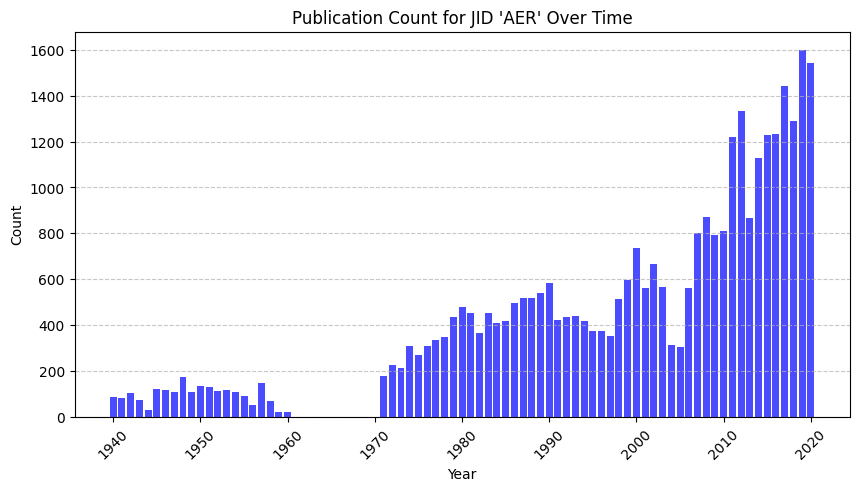

In [35]:
import matplotlib.pyplot as plt

# Assuming red_rel is a pandas DataFrame that is already loaded
# Filtering the data for "jid_o" == "aer" and counting occurrences of "year_o"
year_counts = red_rel[red_rel["jid_o"] == "aer"]["year_o"].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values, color='blue', alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Publication Count for JID 'AER' Over Time")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [13]:
red_rel_r=red_rel.rename(columns={'id_o':'origin_paper_id','year_o':"origin_paper_year", 'jid_o':"origin_journal", 'year_t':"cited_year", 'jid_t':"cited_journal"})



In [14]:
red_rel_r.head()

origin_paper_id  origin_paper_year     id_t origin_journal  cited_year  \
0         1884138               1960  1812343            qje        1958   
1         1883059               1960  1907805            qje        1952   
2         1882300               1957  1803057            qje        1954   
3         1882300               1957  1818330            qje        1954   
4         1882705               1965  1884206            qje        1961   

  cited_journal  
0           aer  
1          ecta  
2           aer  
3           aer  
4           qje

In [15]:
def calculate_journal_rankings(citations_df, damping_factor=0.85, max_iterations=50, tolerance=1e-8):
    """
    Calculate PageRank-based rankings for journals by year.
    """
    yearly_rankings = {}
    
    for year in sorted(citations_df['origin_paper_year'].unique()):
        print(f"\nProcessing year {year}")
        
        # Filter citations for current year
        year_citations = citations_df[citations_df['origin_paper_year'] == year]
        
        # Get unique journals
        journals = sorted(set(year_citations['origin_journal'].unique()) | 
                        set(year_citations['cited_journal'].unique()))
        n_journals = len(journals)
        journal_to_idx = {journal: idx for idx, journal in enumerate(journals)}
        
        # Initialize citation matrix
        citation_matrix = np.zeros((n_journals, n_journals))
        
        # Fill citation matrix
        for _, citation in year_citations.iterrows():
            i = journal_to_idx[citation['origin_journal']]
            j = journal_to_idx[citation['cited_journal']]
            citation_matrix[i][j] += 1
            
        print("\nOriginal citation matrix:")
        print(pd.DataFrame(citation_matrix, columns=journals, index=journals))
            
        # Get outbound citation counts for each journal
        out_citations = citation_matrix.sum(axis=1)
        print("\nOutbound citations per journal:", dict(zip(journals, out_citations)))
        
        # Create transition probability matrix
        transition_matrix = np.zeros((n_journals, n_journals))
        for i in range(n_journals):
            if out_citations[i] > 0:
                transition_matrix[i] = citation_matrix[i] / out_citations[i]
            else:
                # If a journal has no outbound citations, distribute evenly
                transition_matrix[i] = np.ones(n_journals) / n_journals
                
        print("\nTransition probability matrix:")
        print(pd.DataFrame(transition_matrix, columns=journals, index=journals))
        
        # Initialize PageRank scores
        scores = np.ones(n_journals) / n_journals
        
        # Power iteration method
        for iteration in range(max_iterations):
            prev_scores = scores.copy()
            
            # PageRank update step
            new_scores = np.zeros(n_journals)
            for i in range(n_journals):
                # Random jump probability
                new_scores[i] = (1 - damping_factor) / n_journals
                
                # Follow citations probability
                for j in range(n_journals):
                    new_scores[i] += damping_factor * transition_matrix[j,i] * prev_scores[j]
            
            # Update scores
            scores = new_scores
            
            # Check convergence
            diff = np.sum(np.abs(scores - prev_scores))
            print(f"Iteration {iteration + 1}, diff: {diff:.10f}")
            
            if diff < tolerance and iteration > 5:
                print(f"Converged after {iteration + 1} iterations")
                break
        
        print("\nFinal PageRank scores:", dict(zip(journals, scores)))
        
        # Create rankings DataFrame
        rankings = pd.DataFrame({
            'Journal': journals,
            'PageRankScore': scores,
            'OutboundCitations': out_citations,
            'InboundCitations': citation_matrix.sum(axis=0),
            'Rank': pd.Series(scores).rank(ascending=False, method='min')
        }).sort_values('PageRankScore', ascending=False)
        
        rankings = rankings.round(4)
        print("\nFinal rankings:")
        print(rankings)
        
        yearly_rankings[year] = rankings
    
    return yearly_rankings

def analyze_citation_patterns(citations_df, year):
    """
    Analyze detailed citation patterns for a specific year
    """
    year_citations = citations_df[citations_df['origin_paper_year'] == year]
    
    # Self-citation analysis
    self_citations = year_citations[year_citations['origin_journal'] == year_citations['cited_journal']]
    self_citation_counts = self_citations.groupby('origin_journal').size()
    
    # Citation network density
    journals = set(year_citations['origin_journal'].unique()) | set(year_citations['cited_journal'].unique())
    possible_connections = len(journals) * (len(journals) - 1)  # Excluding self-citations
    actual_connections = len(year_citations[year_citations['origin_journal'] != year_citations['cited_journal']])
    network_density = actual_connections / possible_connections if possible_connections > 0 else 0
    
    return {
        'self_citation_counts': self_citation_counts,
        'network_density': network_density,
        'total_citations': len(year_citations),
        'unique_journals': len(journals)
    }

In [16]:
analyze_citation_patterns(red_rel_r, 1941)

{'self_citation_counts': origin_journal
 aer     48
 ecta    12
 jpe      8
 qje     19
 res      3
 dtype: int64,
 'network_density': 4.2,
 'total_citations': 174,
 'unique_journals': 5}

In [17]:
page_rank_out=calculate_journal_rankings(red_rel_r)


Processing year 1940

Original citation matrix:
       aer  ecta   jpe   qje  res
aer   47.0   1.0   9.0  22.0  7.0
ecta   0.0  13.0   0.0   2.0  1.0
jpe    8.0   4.0  16.0   5.0  4.0
qje    9.0   4.0   6.0  17.0  1.0
res    0.0   5.0   1.0   2.0  3.0

Outbound citations per journal: {'aer': np.float64(86.0), 'ecta': np.float64(16.0), 'jpe': np.float64(37.0), 'qje': np.float64(37.0), 'res': np.float64(11.0)}

Transition probability matrix:
           aer      ecta       jpe       qje       res
aer   0.546512  0.011628  0.104651  0.255814  0.081395
ecta  0.000000  0.812500  0.000000  0.125000  0.062500
jpe   0.216216  0.108108  0.432432  0.135135  0.108108
qje   0.243243  0.108108  0.162162  0.459459  0.027027
res   0.000000  0.454545  0.090909  0.181818  0.272727
Iteration 1, diff: 0.2237497143
Iteration 2, diff: 0.0631477171
Iteration 3, diff: 0.0243476514
Iteration 4, diff: 0.0127490415
Iteration 5, diff: 0.0074552692
Iteration 6, diff: 0.0045583115
Iteration 7, diff: 0.0028400173
I

In [ ]:
def calculate_multiple_metrics(citations_df, window_years=2):
    """
    Calculate multiple journal importance metrics for each year.
    
    Parameters:
    -----------
    citations_df : pandas.DataFrame
        DataFrame with columns: origin_journal, origin_paper_year, cited_journal, cited_year
    window_years : int
        Number of years to consider for impact factor calculation
    """
    yearly_metrics = {}
    
    for year in sorted(citations_df['origin_paper_year'].unique()):
        # Get citations for this year
        year_citations = citations_df[citations_df['origin_paper_year'] == year]
        
        # Get unique journals
        journals = sorted(set(year_citations['origin_journal'].unique()) | 
                        set(year_citations['cited_journal'].unique()))
        
        # 1. Basic Citation Metrics
        metrics = {}
        for journal in journals:
            # Total citations received
            citations_received = len(year_citations[year_citations['cited_journal'] == journal])
            
            # Total papers published (as citing papers)
            papers_published = len(year_citations[year_citations['origin_journal'] == journal]['origin_paper_id'].unique())
            
            # Self-citation rate
            self_citations = len(year_citations[
                (year_citations['origin_journal'] == journal) & 
                (year_citations['cited_journal'] == journal)
            ])
            
            # Impact Factor (citations to papers in previous window_years)
            impact_window = citations_df[
                (citations_df['origin_paper_year'] == year) &
                (citations_df['cited_journal'] == journal) &
                (citations_df['cited_year'].between(year - window_years, year - 1))
            ]
            impact_factor = len(impact_window) / window_years if window_years > 0 else 0
            
            metrics[journal] = {
                'TotalCitationsReceived': citations_received,
                'PapersPublished': papers_published,
                'CitationsPerPaper': citations_received / papers_published if papers_published > 0 else 0,
                'SelfCitationRate': self_citations / citations_received if citations_received > 0 else 0,
                'ImpactFactor': impact_factor
            }
        
        # 2. Network Centrality Metrics
        # Create adjacency matrix
        n_journals = len(journals)
        journal_to_idx = {j: i for i, j in enumerate(journals)}
        adjacency = np.zeros((n_journals, n_journals))
        
        for _, citation in year_citations.iterrows():
            i = journal_to_idx[citation['origin_journal']]
            j = journal_to_idx[citation['cited_journal']]
            adjacency[i, j] += 1
        
        # Calculate degree centrality
        in_degree = adjacency.sum(axis=0)
        out_degree = adjacency.sum(axis=1)
        
        # Calculate local clustering coefficients
        for idx, journal in enumerate(journals):
            metrics[journal].update({
                'InDegreeCentrality': in_degree[idx] / (n_journals - 1),
                'OutDegreeCentrality': out_degree[idx] / (n_journals - 1),
                'TotalDegree': (in_degree[idx] + out_degree[idx]) / (2 * (n_journals - 1))
            })
        
        # 3. Create final rankings DataFrame
        rankings = pd.DataFrame.from_dict(metrics, orient='index')
        rankings.index.name = 'Journal'
        rankings = rankings.reset_index()
        
        # Add ranks for each metric
        for column in rankings.select_dtypes(include=[np.number]).columns:
            rankings[f'{column}Rank'] = rankings[column].rank(ascending=False, method='min')
        
        # Calculate composite score (example weighting)
        rankings['CompositeScore'] = (
            0.4 * rankings['CitationsPerPaper'] / rankings['CitationsPerPaper'].max() +
            0.3 * rankings['ImpactFactor'] / rankings['ImpactFactor'].max() +
            0.2 * rankings['InDegreeCentrality'] / rankings['InDegreeCentrality'].max() +
            0.1 * (1 - rankings['SelfCitationRate'])  # Lower self-citation rate is better
        )
        # CitationsPerPaper + ImpactFactor + InDegreeCentrality + SelfCitationRate
        rankings['CompositeRank'] = rankings['CompositeScore'].rank(ascending=False, method='min')
        rankings = rankings.sort_values('CompositeScore', ascending=False)
        
        yearly_metrics[year] = rankings.round(4)
    
    return yearly_metrics

def print_yearly_metrics(metrics, top_n=5):
    """
    Print rankings in a formatted way, showing top N journals per year.
    """
    for year, ranking_df in sorted(metrics.items()):
        print(f"\nTop {top_n} Journals for Year {year}")
        print("-" * 70)
        columns_to_show = ['Journal', 'CompositeScore', 'CompositeRank', 
                          'CitationsPerPaper', 'ImpactFactor', 'SelfCitationRate']
        print(ranking_df[columns_to_show].head(top_n).to_string(index=False))

In [19]:
red_rel_r.head()

origin_paper_id  origin_paper_year     id_t origin_journal  cited_year  \
0         1884138               1960  1812343            qje        1958   
1         1883059               1960  1907805            qje        1952   
2         1882300               1957  1803057            qje        1954   
3         1882300               1957  1818330            qje        1954   
4         1882705               1965  1884206            qje        1961   

  cited_journal  
0           aer  
1          ecta  
2           aer  
3           aer  
4           qje

In [20]:
m_met_5=calculate_multiple_metrics(red_rel_r,5)

In [ ]:
m_met_10=calculate_multiple_metrics(red_rel_r,10)

In [55]:
m_met_80=calculate_multiple_metrics(red_rel_r,80)

In [50]:
red_rel_r["cited_journal"].value_counts()

cited_journal
aer     28915
ecta    27633
jpe     20828
qje     16704
res     13294
Name: count, dtype: int64

In [57]:
m_met_5[2020]

Journal  TotalCitationsReceived  PapersPublished  CitationsPerPaper  \
0     aer                    1926              115            16.7478   
3     qje                    1050               39            26.9231   
1    ecta                    1203               81            14.8519   
2     jpe                     804               98             8.2041   
4     res                     665               75             8.8667   

   SelfCitationRate  ImpactFactor  InDegreeCentrality  OutDegreeCentrality  \
0            0.2897         101.4              481.50               385.75   
3            0.1800          47.2              262.50               182.25   
1            0.2818          42.6              300.75               259.50   
2            0.2537          33.0              201.00               317.50   
4            0.2165          28.8              166.25               267.00   

   TotalDegree  TotalCitationsReceivedRank  PapersPublishedRank  \
0      433.625                         1.0                  1.0   
3      222.375                         3.0                  5.0   
1      280.125                         2.0                  3.0   
2      259.250                         4.0                  2.0   
4      216.625                         5.0                  4.0   

   CitationsPerPaperRank  SelfCitationRateRank  ImpactFactorRank  \
0                    2.0                   1.0               1.0   
3                    1.0                   5.0               2.0   
1                    3.0                   2.0               3.0   
2                    5.0                   3.0               4.0   
4                    4.0                   4.0               5.0   

   InDegreeCentralityRank  OutDegreeCentralityRank  TotalDegreeRank  \
0                     1.0                      1.0              1.0   
3                     3.0                      5.0              4.0   
1                     2.0                      4.0              2.0   
2                     4.0                      2.0              3.0   
4                     5.0                      3.0              5.0   

   CompositeScore  CompositeRank  Year  
0          0.8199            1.0  2020  
3          0.7307            2.0  2020  
1          0.5434            3.0  2020  
2          0.3776            4.0  2020  
4          0.3643            5.0  2020

In [54]:
m_met_10[2020]

Journal  TotalCitationsReceived  PapersPublished  CitationsPerPaper  \
0     aer                    1926              115            16.7478   
3     qje                    1050               39            26.9231   
1    ecta                    1203               81            14.8519   
4     res                     665               75             8.8667   
2     jpe                     804               98             8.2041   

   SelfCitationRate  ImpactFactor  InDegreeCentrality  OutDegreeCentrality  \
0            0.2897         109.4              481.50               385.75   
3            0.1800          51.2              262.50               182.25   
1            0.2818          43.0              300.75               259.50   
4            0.2165          28.6              166.25               267.00   
2            0.2537          27.0              201.00               317.50   

   TotalDegree  TotalCitationsReceivedRank  PapersPublishedRank  \
0      433.625                         1.0                  1.0   
3      222.375                         3.0                  5.0   
1      280.125                         2.0                  3.0   
4      216.625                         5.0                  4.0   
2      259.250                         4.0                  2.0   

   CitationsPerPaperRank  SelfCitationRateRank  ImpactFactorRank  \
0                    2.0                   1.0               1.0   
3                    1.0                   5.0               2.0   
1                    3.0                   2.0               3.0   
4                    4.0                   4.0               4.0   
2                    5.0                   3.0               5.0   

   InDegreeCentralityRank  OutDegreeCentralityRank  TotalDegreeRank  \
0                     1.0                      1.0              1.0   
3                     3.0                      5.0              4.0   
1                     2.0                      4.0              2.0   
4                     5.0                      3.0              5.0   
2                     4.0                      2.0              3.0   

   CompositeScore  CompositeRank  Year  
0          0.8199            1.0  2020  
3          0.7314            2.0  2020  
1          0.5353            3.0  2020  
4          0.3576            4.0  2020  
2          0.3540            5.0  2020

In [56]:
m_met_80[2020]

Journal  TotalCitationsReceived  PapersPublished  CitationsPerPaper  \
0     aer                    1926              115            16.7478   
3     qje                    1050               39            26.9231   
1    ecta                    1203               81            14.8519   
2     jpe                     804               98             8.2041   
4     res                     665               75             8.8667   

   SelfCitationRate  ImpactFactor  InDegreeCentrality  OutDegreeCentrality  \
0            0.2897       23.8125              481.50               385.75   
3            0.1800       12.8875              262.50               182.25   
1            0.2818       14.7750              300.75               259.50   
2            0.2537        9.7625              201.00               317.50   
4            0.2165        8.0875              166.25               267.00   

   TotalDegree  TotalCitationsReceivedRank  PapersPublishedRank  \
0      433.625                         1.0                  1.0   
3      222.375                         3.0                  5.0   
1      280.125                         2.0                  3.0   
2      259.250                         4.0                  2.0   
4      216.625                         5.0                  4.0   

   CitationsPerPaperRank  SelfCitationRateRank  ImpactFactorRank  \
0                    2.0                   1.0               1.0   
3                    1.0                   5.0               3.0   
1                    3.0                   2.0               2.0   
2                    5.0                   3.0               4.0   
4                    4.0                   4.0               5.0   

   InDegreeCentralityRank  OutDegreeCentralityRank  TotalDegreeRank  \
0                     1.0                      1.0              1.0   
3                     3.0                      5.0              4.0   
1                     2.0                      4.0              2.0   
2                     4.0                      2.0              3.0   
4                     5.0                      3.0              5.0   

   CompositeScore  CompositeRank  
0          0.8199            1.0  
3          0.7534            2.0  
1          0.6035            3.0  
2          0.4030            4.0  
4          0.3810            5.0

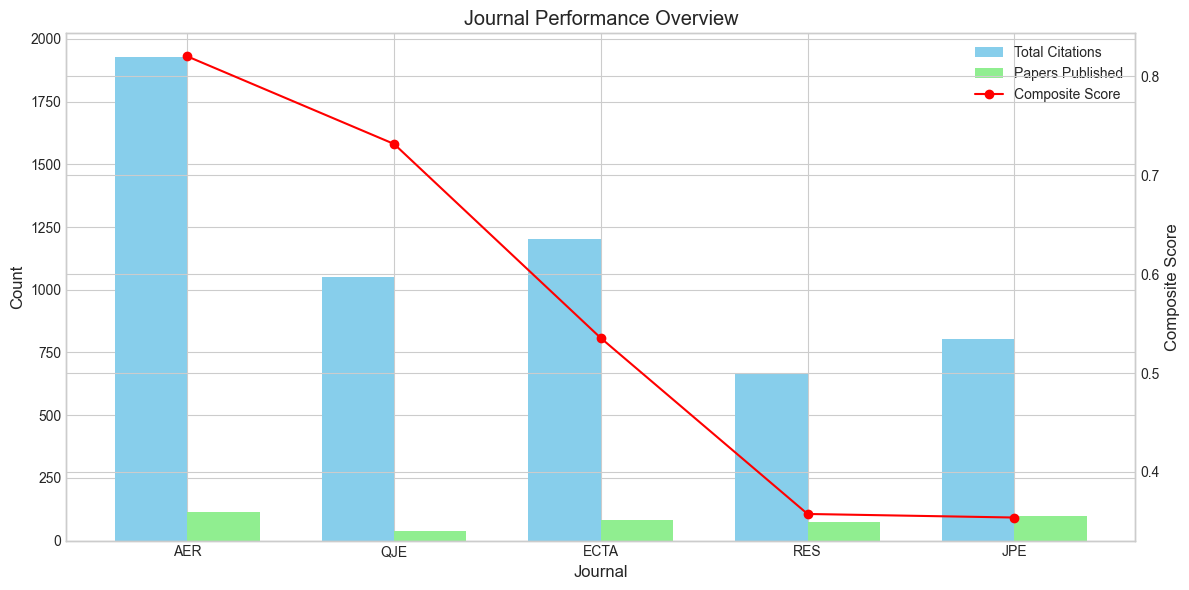

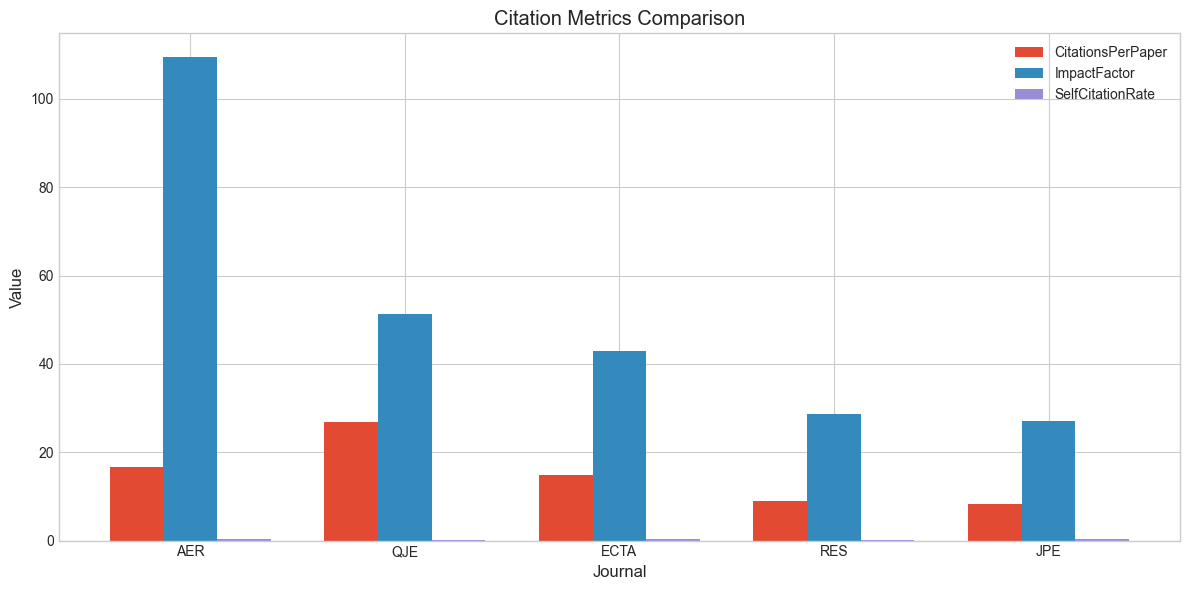

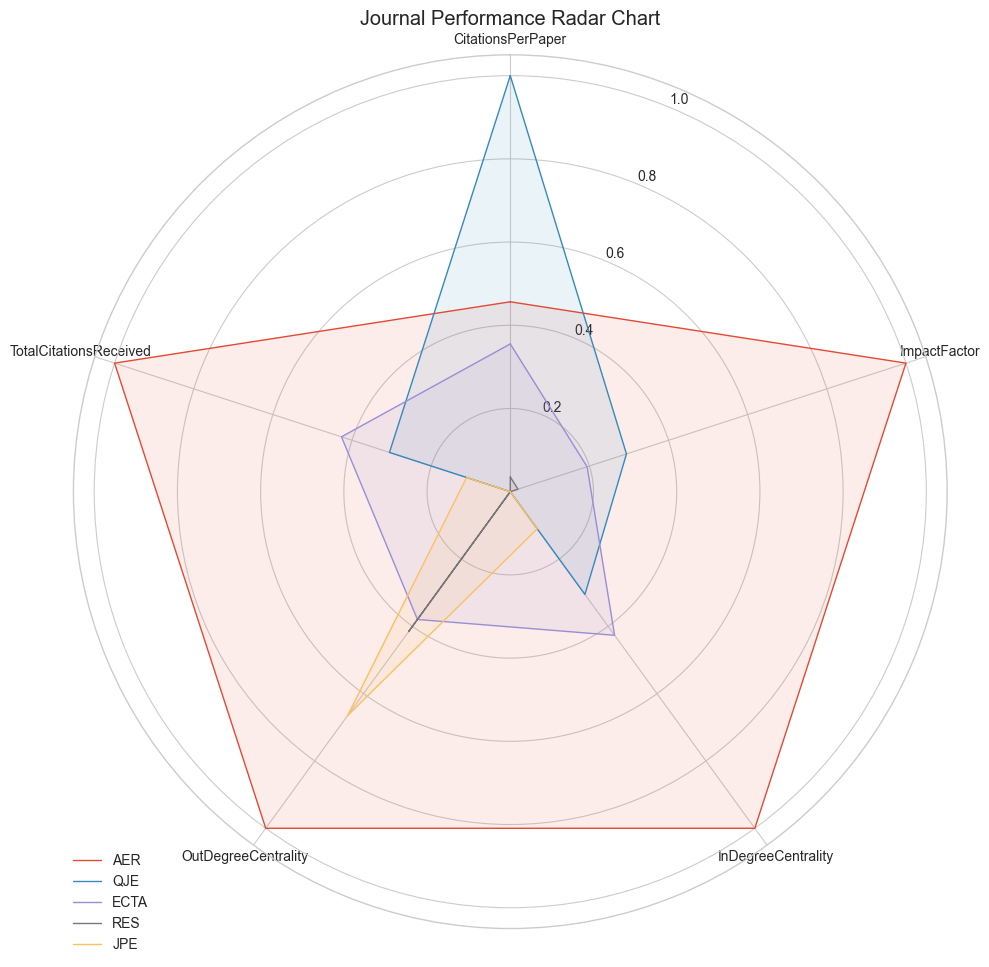

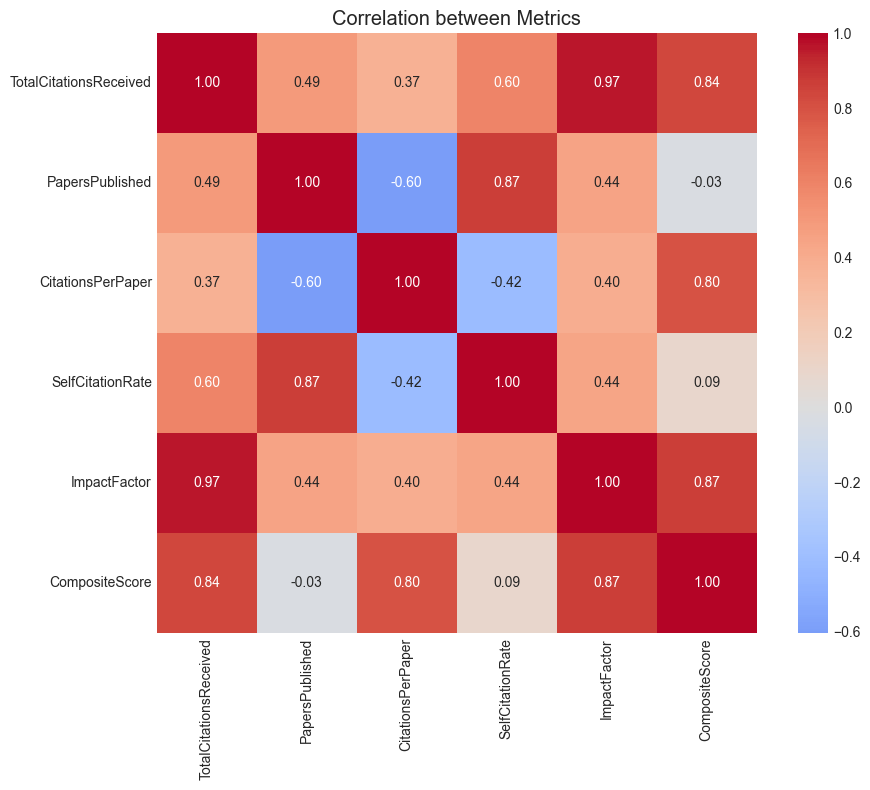

In [58]:
create_journal_visualizations(m_met_10[2020])

In [ ]:
m_met_10[1940].to_csv("page_rank_compo.csv", index=False)

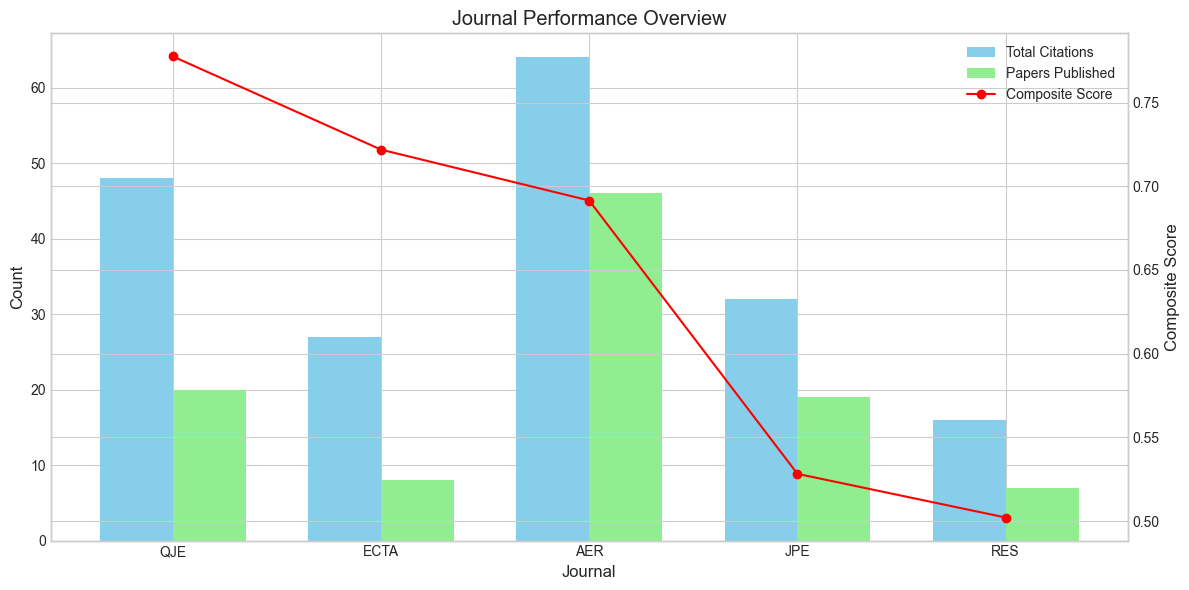

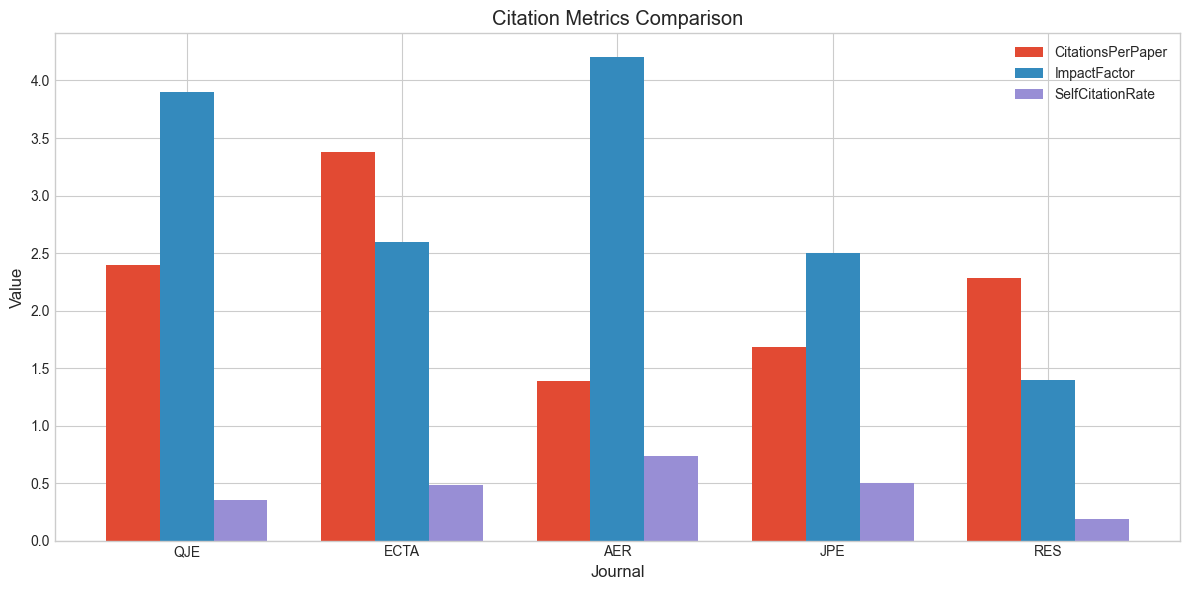

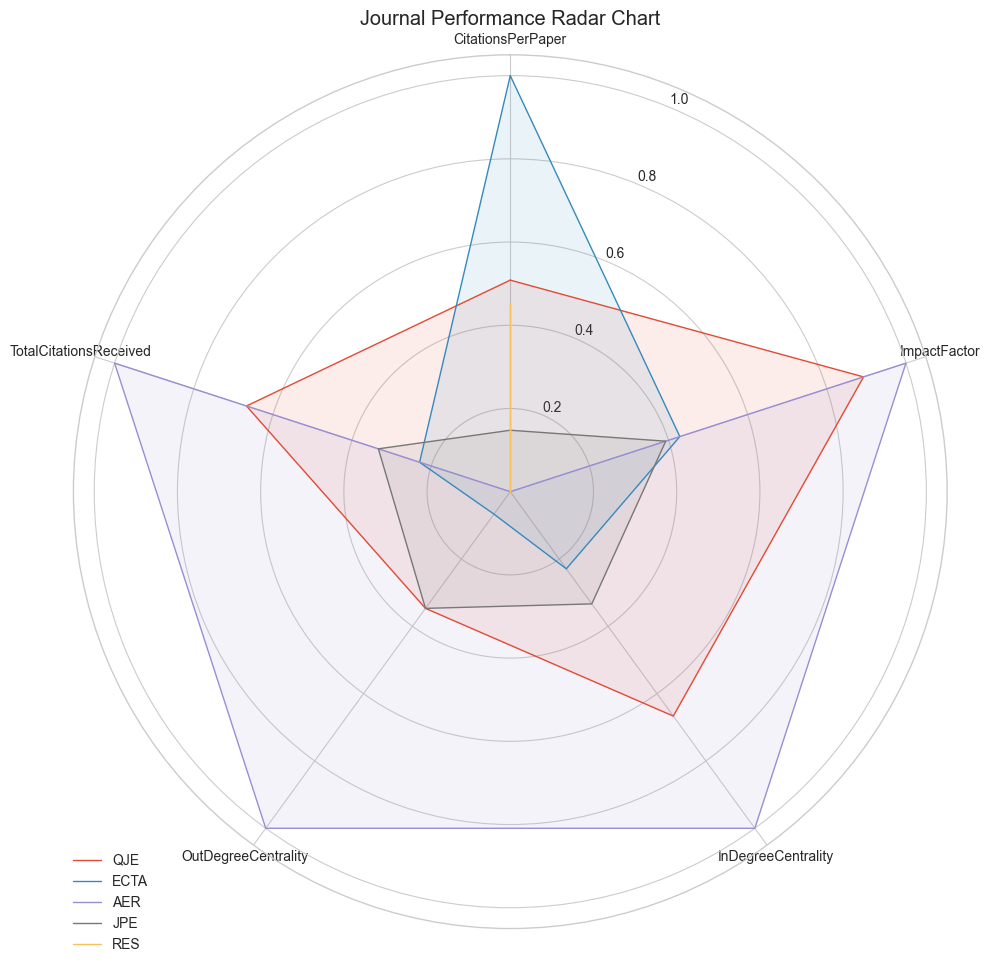

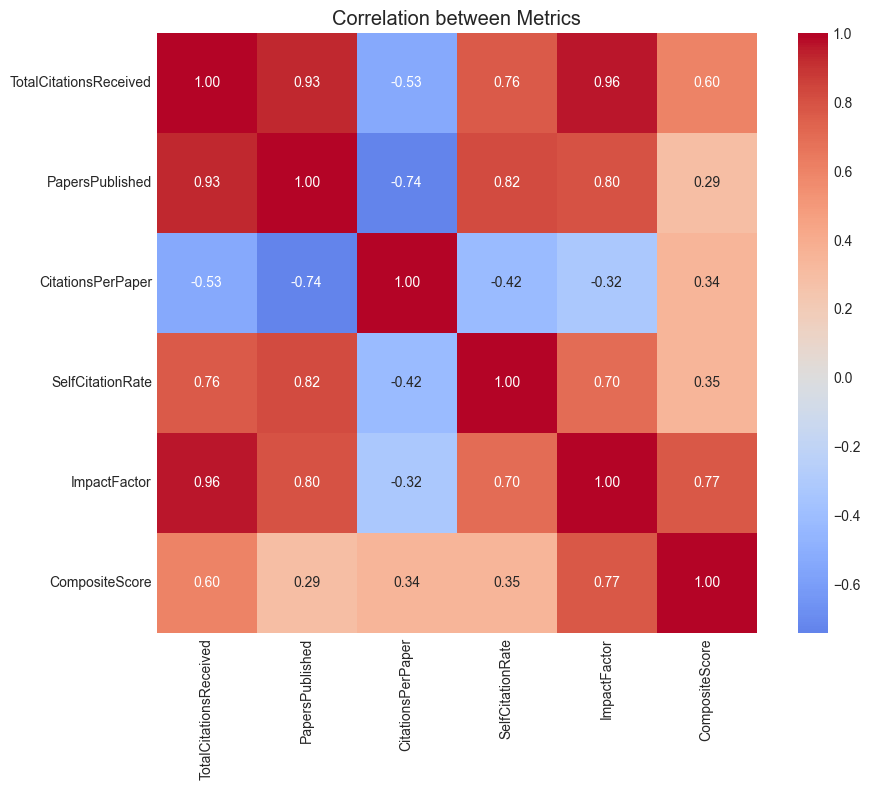

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_journal_visualizations(df):
    """
    Create comprehensive visualizations for journal rankings data
    
    Parameters:
    df: pandas DataFrame with journal metrics
    """
    # Set style
    # plt.style.use('seaborn-v0_8-whitegrid')
    
    # 1. Overview Bar Plot with Composite Score
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Plot bars for citations and papers
    x = np.arange(len(df))
    width = 0.35
    ax1.bar(x - width/2, df['TotalCitationsReceived'], width, label='Total Citations', color='skyblue')
    ax1.bar(x + width/2, df['PapersPublished'], width, label='Papers Published', color='lightgreen')
    
    # Plot line for composite score
    ax2.plot(x, df['CompositeScore'], color='red', marker='o', label='Composite Score')
    
    # Customize plot
    ax1.set_xlabel('Journal')
    ax1.set_ylabel('Count')
    ax2.set_ylabel('Composite Score')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df['Journal'].str.upper())
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.title('Journal Performance Overview')
    plt.tight_layout()
    
    # 2. Citation Metrics Comparison
    plt.figure(figsize=(12, 6))
    
    metrics = ['CitationsPerPaper', 'ImpactFactor', 'SelfCitationRate']
    x = np.arange(len(df))
    width = 0.25
    
    for i, metric in enumerate(metrics):
        plt.bar(x + i*width - width, df[metric], width, label=metric)
    
    plt.xlabel('Journal')
    plt.ylabel('Value')
    plt.title('Citation Metrics Comparison')
    plt.xticks(x, df['Journal'].str.upper())
    plt.legend()
    plt.tight_layout()
    
    # 3. Radar Chart
    plt.figure(figsize=(10, 10))
    
    # Prepare data for radar chart
    categories = ['CitationsPerPaper', 'ImpactFactor', 'InDegreeCentrality', 
                 'OutDegreeCentrality', 'TotalCitationsReceived']
    
    # Normalize the data
    df_normalized = df[categories].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    # Number of variables
    num_vars = len(categories)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # complete the circle
    
    # Create subplot with polar projection
    ax = plt.subplot(111, projection='polar')
    
    # Plot data
    for idx, journal in enumerate(df['Journal']):
        values = df_normalized.iloc[idx].values.tolist()
        values += values[:1]  # complete the circle
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=journal.upper())
        ax.fill(angles, values, alpha=0.1)
    
    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw axis lines for each angle and label
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Journal Performance Radar Chart')
    
    plt.tight_layout()
    
    # 4. Correlation Heatmap
    plt.figure(figsize=(10, 8))
    
    # Select numeric columns for correlation
    numeric_cols = ['TotalCitationsReceived', 'PapersPublished', 'CitationsPerPaper', 
                   'SelfCitationRate', 'ImpactFactor', 'CompositeScore']
    correlation = df[numeric_cols].corr()
    
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', square=True)
    plt.title('Correlation between Metrics')
    plt.tight_layout()
    
    # Show all plots
    plt.show()

# Example usage:
df = m_met_10[1940]

create_journal_visualizations(df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_time_series_visualizations(df):
    """
    Create visualizations for journal metrics over time (1940-2020)
    
    Parameters:
    df: pandas DataFrame with columns for year, journal, and metrics
    """
    # plt.style.use('seaborn')
    
    # 1. Composite Score Evolution
    plt.figure(figsize=(15, 6))
    for journal in df['Journal'].unique():
        journal_data = df[df['Journal'] == journal]
        plt.plot(journal_data['Year'], journal_data['CompositeScore'], 
                marker='o', markersize=2, label=journal.upper())
    
    plt.title('Evolution of Journal Composite Scores (1940-2020)')
    plt.xlabel('Year')
    plt.ylabel('Composite Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
    # 2. Impact Factor Heat Map
    plt.figure(figsize=(15, 6))
    impact_pivot = df.pivot(index='Year', columns='Journal', values='ImpactFactor')
    sns.heatmap(impact_pivot, cmap='YlOrRd', center=impact_pivot.mean().mean())
    plt.title('Impact Factor Evolution Heatmap')
    plt.xlabel('Journal')
    plt.ylabel('Year')
    plt.tight_layout()
    
    # 3. Citations Per Paper Box Plot by Decade
    plt.figure(figsize=(15, 6))
    df['Decade'] = (df['Year'] // 10) * 10
    sns.boxplot(x='Decade', y='CitationsPerPaper', hue='Journal', data=df)
    plt.title('Citations Per Paper Distribution by Decade')
    plt.xlabel('Decade')
    plt.ylabel('Citations Per Paper')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # 4. Self-Citation Rate Trends
    plt.figure(figsize=(15, 6))
    for journal in df['Journal'].unique():
        journal_data = df[df['Journal'] == journal]
        # Calculate 5-year moving average
        moving_avg = journal_data.set_index('Year')['SelfCitationRate'].rolling(window=10).mean()
        plt.plot(moving_avg.index, moving_avg, label=f"{journal.upper()} (10-year MA)")
    
    plt.title('Self-Citation Rate Trends (10-year Moving Average)')
    plt.xlabel('Year')
    plt.ylabel('Self-Citation Rate')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
    # 5. Stacked Area Chart of Total Citations Market Share
    plt.figure(figsize=(15, 6))
    # Calculate market share of citations for each journal per year
    yearly_total = df.groupby('Year')['TotalCitationsReceived'].sum()
    citation_shares = df.copy()
    citation_shares['CitationShare'] = citation_shares.apply(
        lambda x: x['TotalCitationsReceived'] / yearly_total[x['Year']], axis=1)
    
    citation_pivot = citation_shares.pivot(index='Year', columns='Journal', values='CitationShare')
    citation_pivot.plot(kind='area', stacked=True)
    plt.title('Journal Citation Market Share Over Time')
    plt.xlabel('Year')
    plt.ylabel('Share of Total Citations')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # 6. Network Centrality Evolution
    plt.figure(figsize=(15, 6))
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    for journal in df['Journal'].unique():
        journal_data = df[df['Journal'] == journal]
        # Plot In-Degree Centrality
        ax1.plot(journal_data['Year'], journal_data['InDegreeCentrality'], 
                label=journal.upper(), marker='o', markersize=2)
        # Plot Out-Degree Centrality
        ax2.plot(journal_data['Year'], journal_data['OutDegreeCentrality'], 
                label=journal.upper(), marker='o', markersize=2)
    
    ax1.set_title('In-Degree Centrality Evolution')
    ax2.set_title('Out-Degree Centrality Evolution')
    ax1.set_xlabel('Year')
    ax2.set_xlabel('Year')
    ax1.set_ylabel('In-Degree Centrality')
    ax2.set_ylabel('Out-Degree Centrality')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True)
    ax2.grid(True)
    plt.tight_layout()
    
    # 7. Decade-wise Changes in Publication Volume
    plt.figure(figsize=(15, 6))
    decade_papers = df.groupby(['Decade', 'Journal'])['PapersPublished'].mean().unstack()
    decade_papers.plot(kind='bar', width=0.8)
    plt.title('Average Papers Published per Decade')
    plt.xlabel('Decade')
    plt.ylabel('Average Papers Published')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

# # Example structure for time series data
# years = range(1940, 2021)
# journals = ['aer', 'ecta', 'jpe', 'qje', 'res']
# data = []

# # In practice, you would load your actual data here
# # This is just a structure example
# for year in range(1940,2021):
#     for journal in journals:
#         data.append({
#             'Year': year,
#             'Journal': journal,
#             'TotalCitationsReceived': np.random.randint(10, 100),
#             'PapersPublished': np.random.randint(5, 50),
#             'CitationsPerPaper': np.random.uniform(1, 4),
#             'SelfCitationRate': np.random.uniform(0.1, 0.8),
#             'ImpactFactor': np.random.uniform(2, 8),
#             'InDegreeCentrality': np.random.uniform(4, 16),
#             'OutDegreeCentrality': np.random.uniform(2, 22),
#             'CompositeScore': np.random.uniform(0.4, 0.8)
#         })

# df = pd.DataFrame(data)
# create_time_series_visualizations(df)

In [40]:
# Example structure for time series data
years = range(1940, 2021)
journals = ['aer', 'ecta', 'jpe', 'qje', 'res']
data = []

# In practice, you would load your actual data here
# This is just a structure example
for year in years:
    m_met_10[year]["Year"]=year
    m_met_5[year]["Year"]=year



In [59]:
data=[]
for year in range(1940,2021):
    data.append(m_met_10[year])

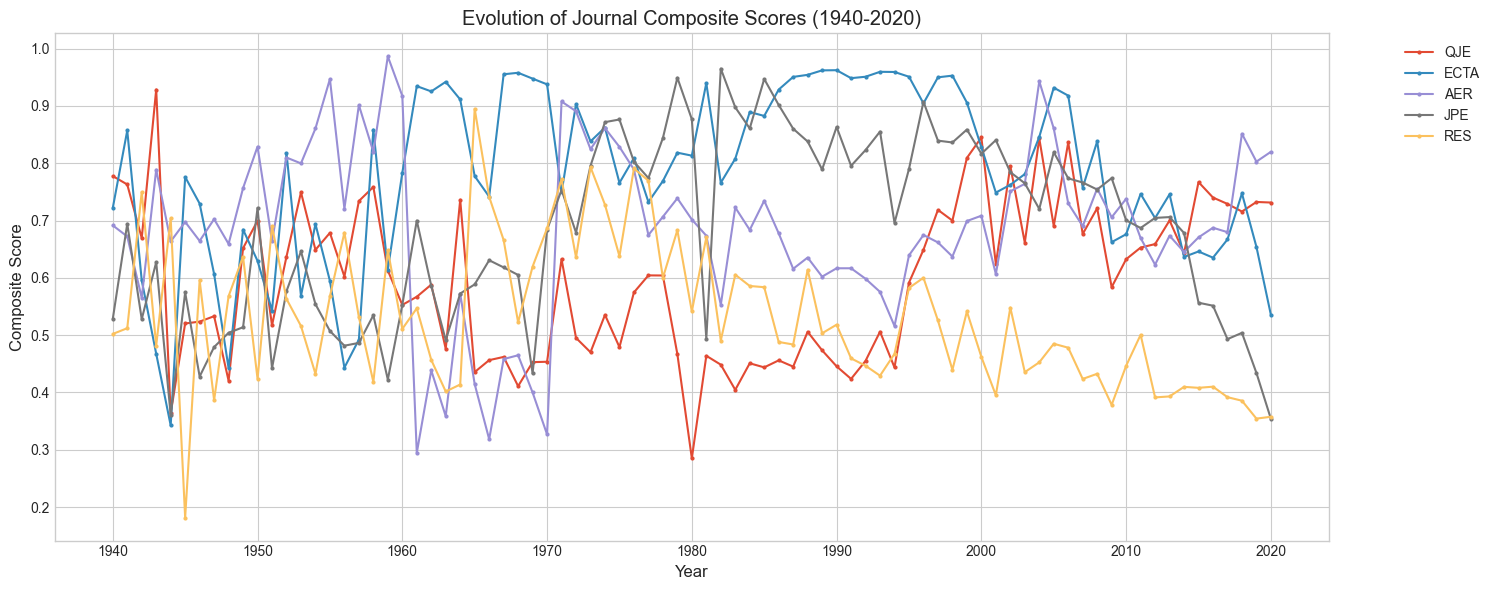

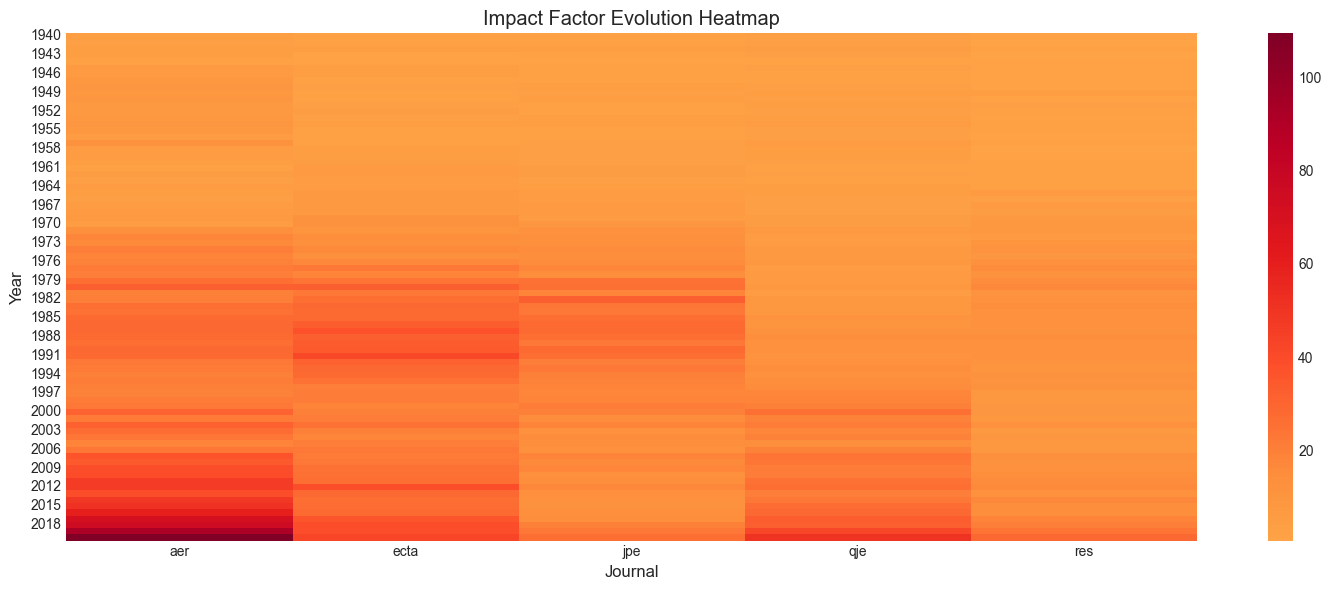

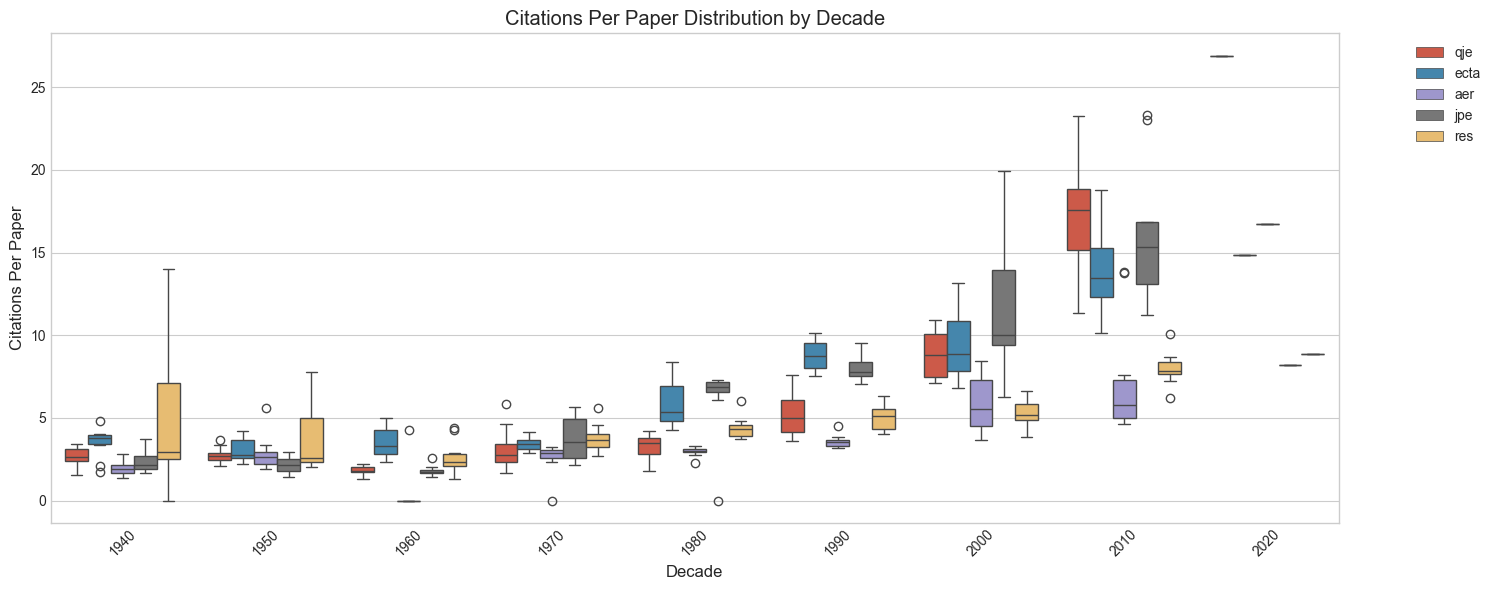

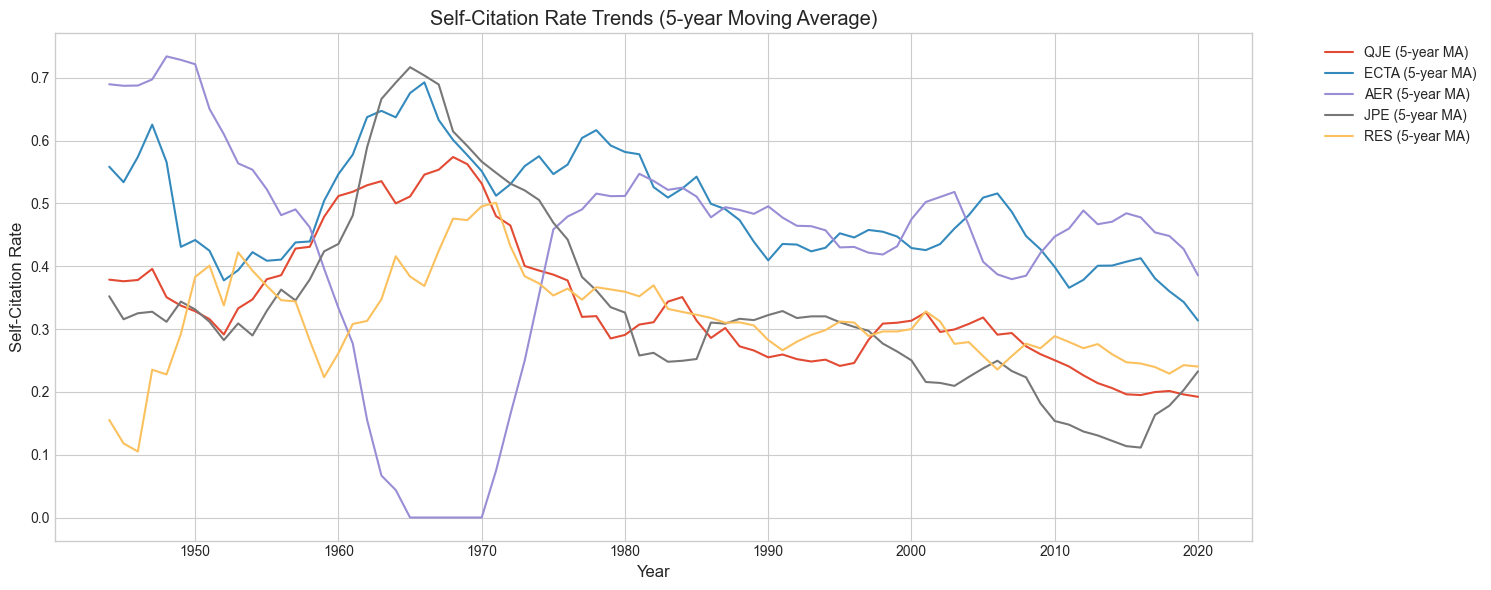

<Figure size 1500x600 with 0 Axes>

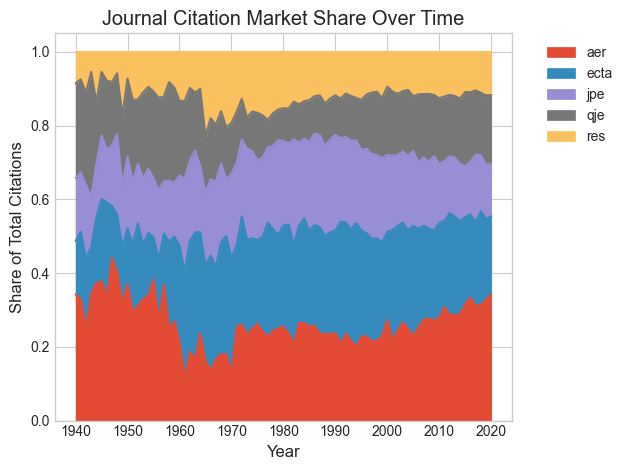

<Figure size 1500x600 with 0 Axes>

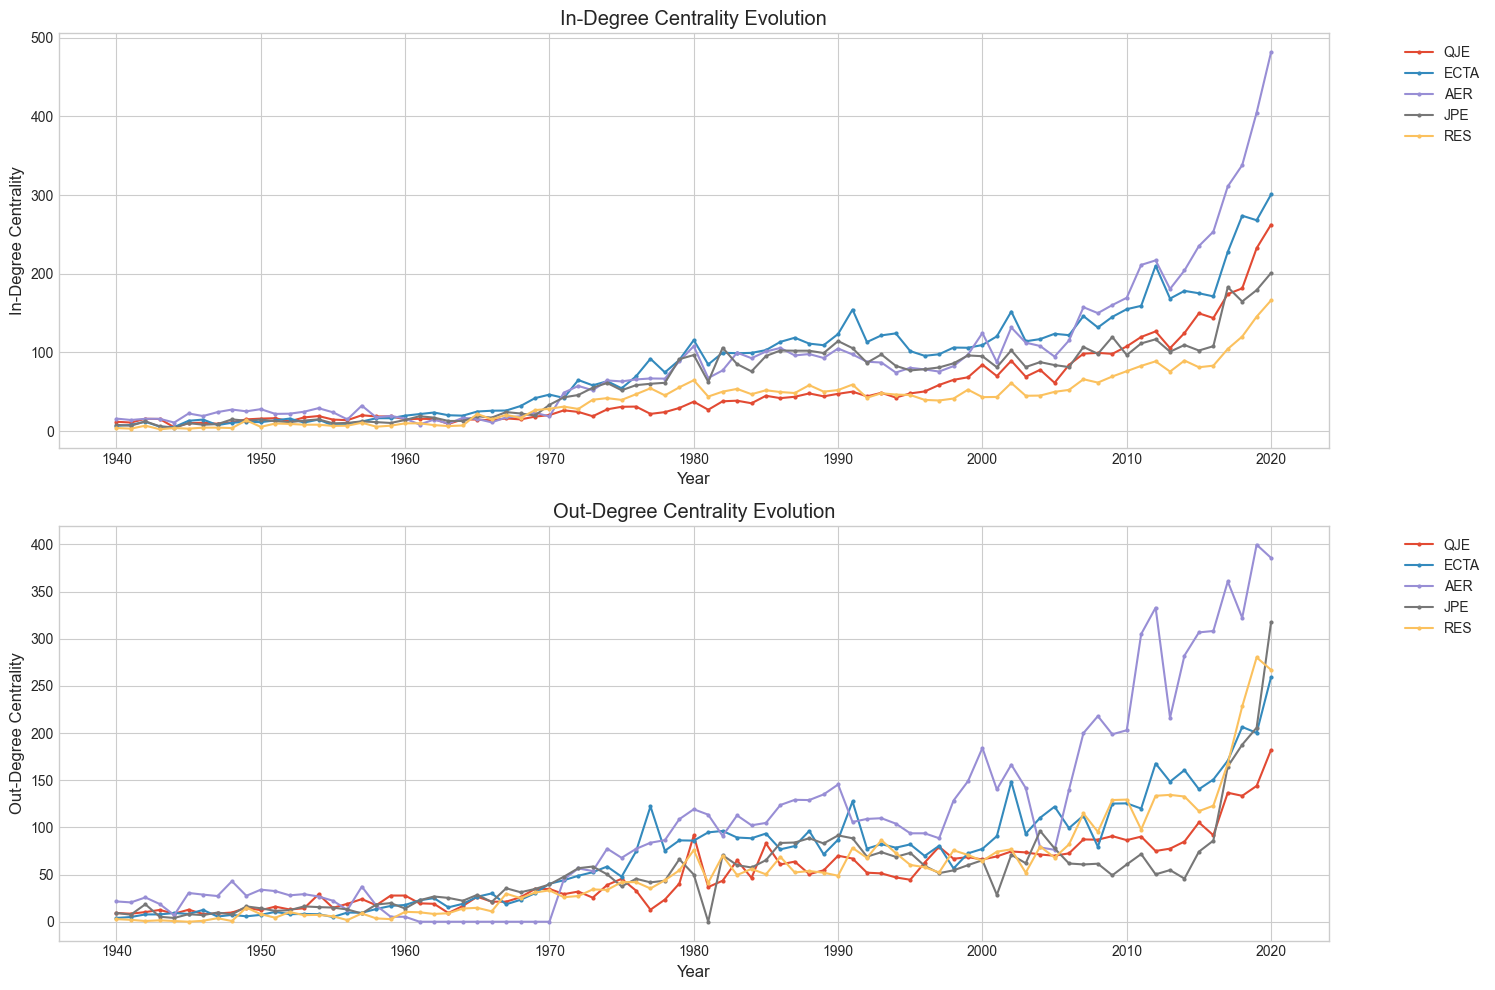

<Figure size 1500x600 with 0 Axes>

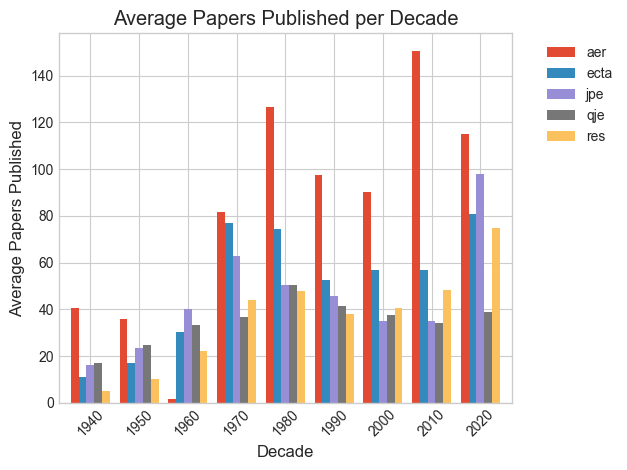

In [60]:
create_time_series_visualizations(pd.concat(data).reset_index(drop=True))

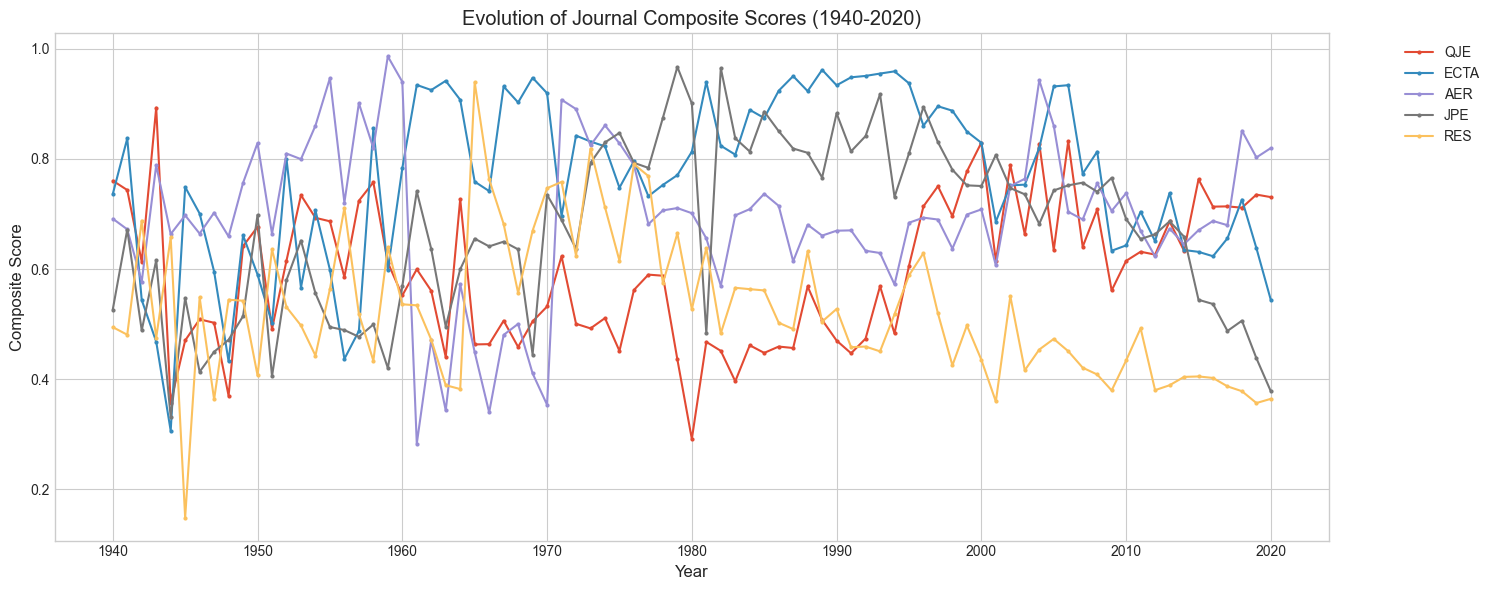

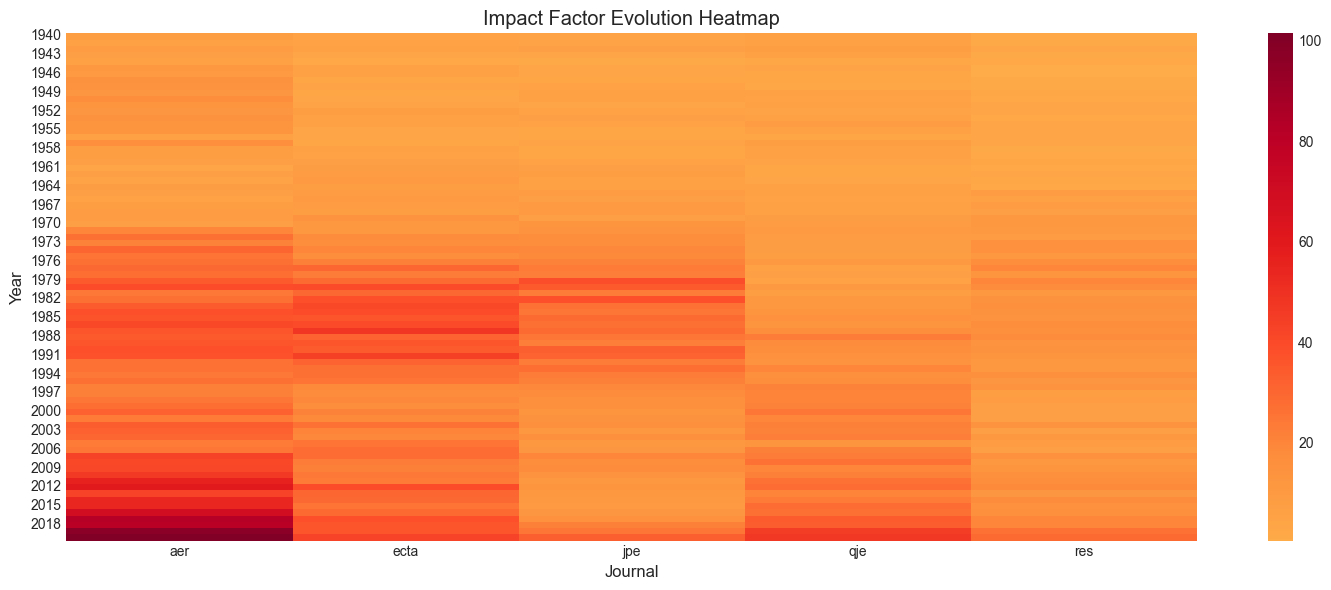

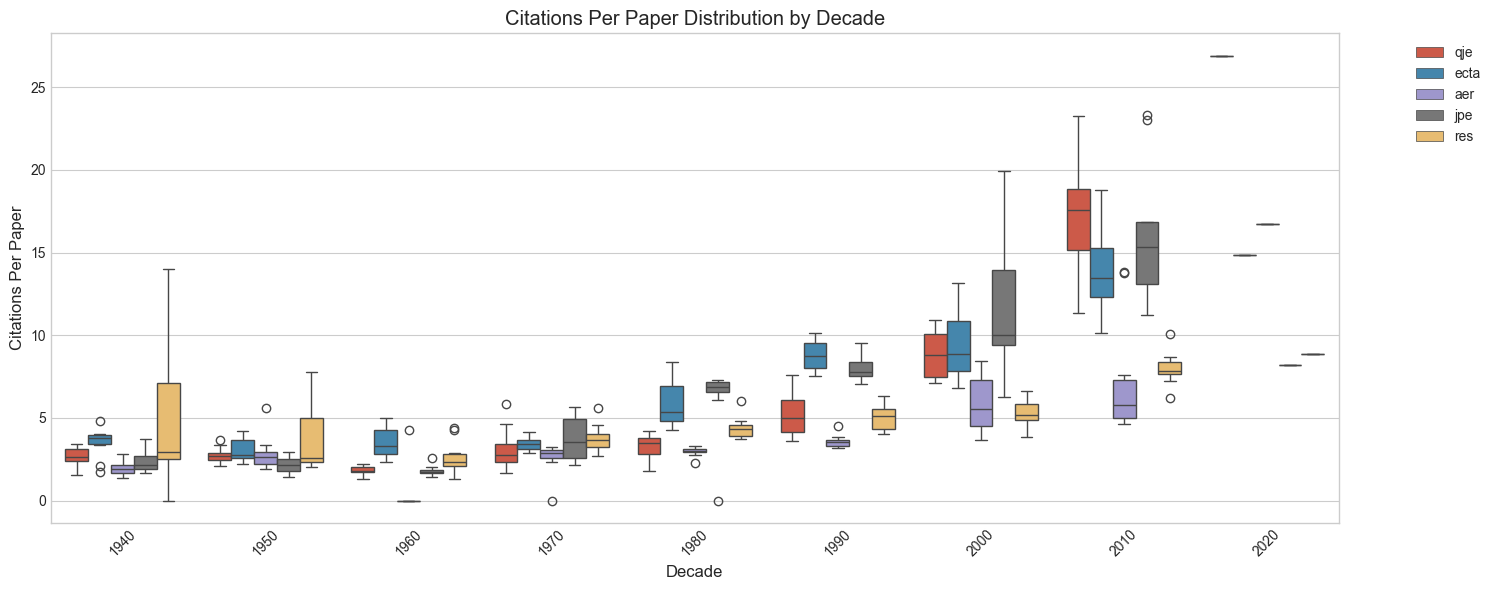

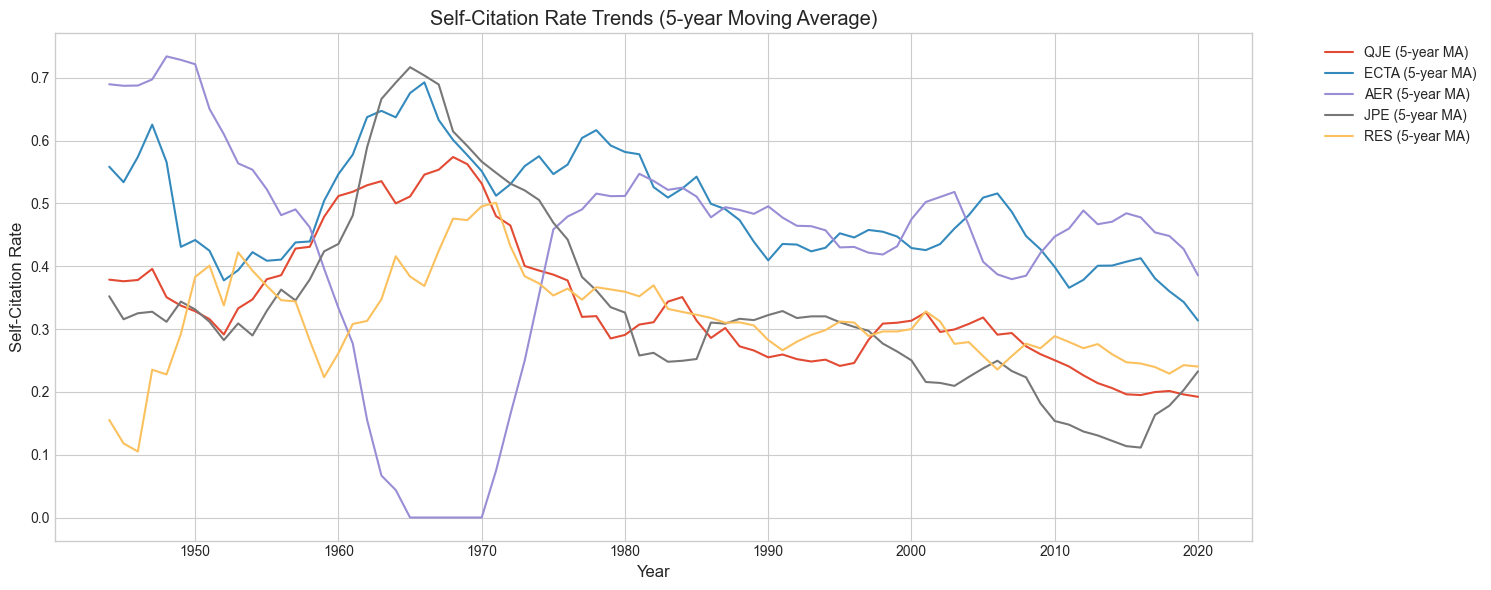

<Figure size 1500x600 with 0 Axes>

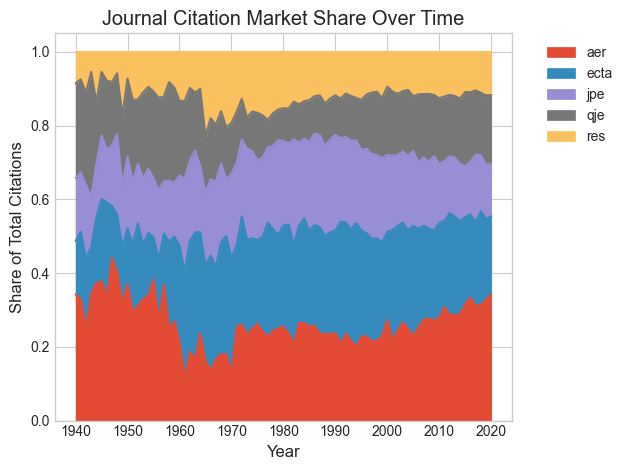

<Figure size 1500x600 with 0 Axes>

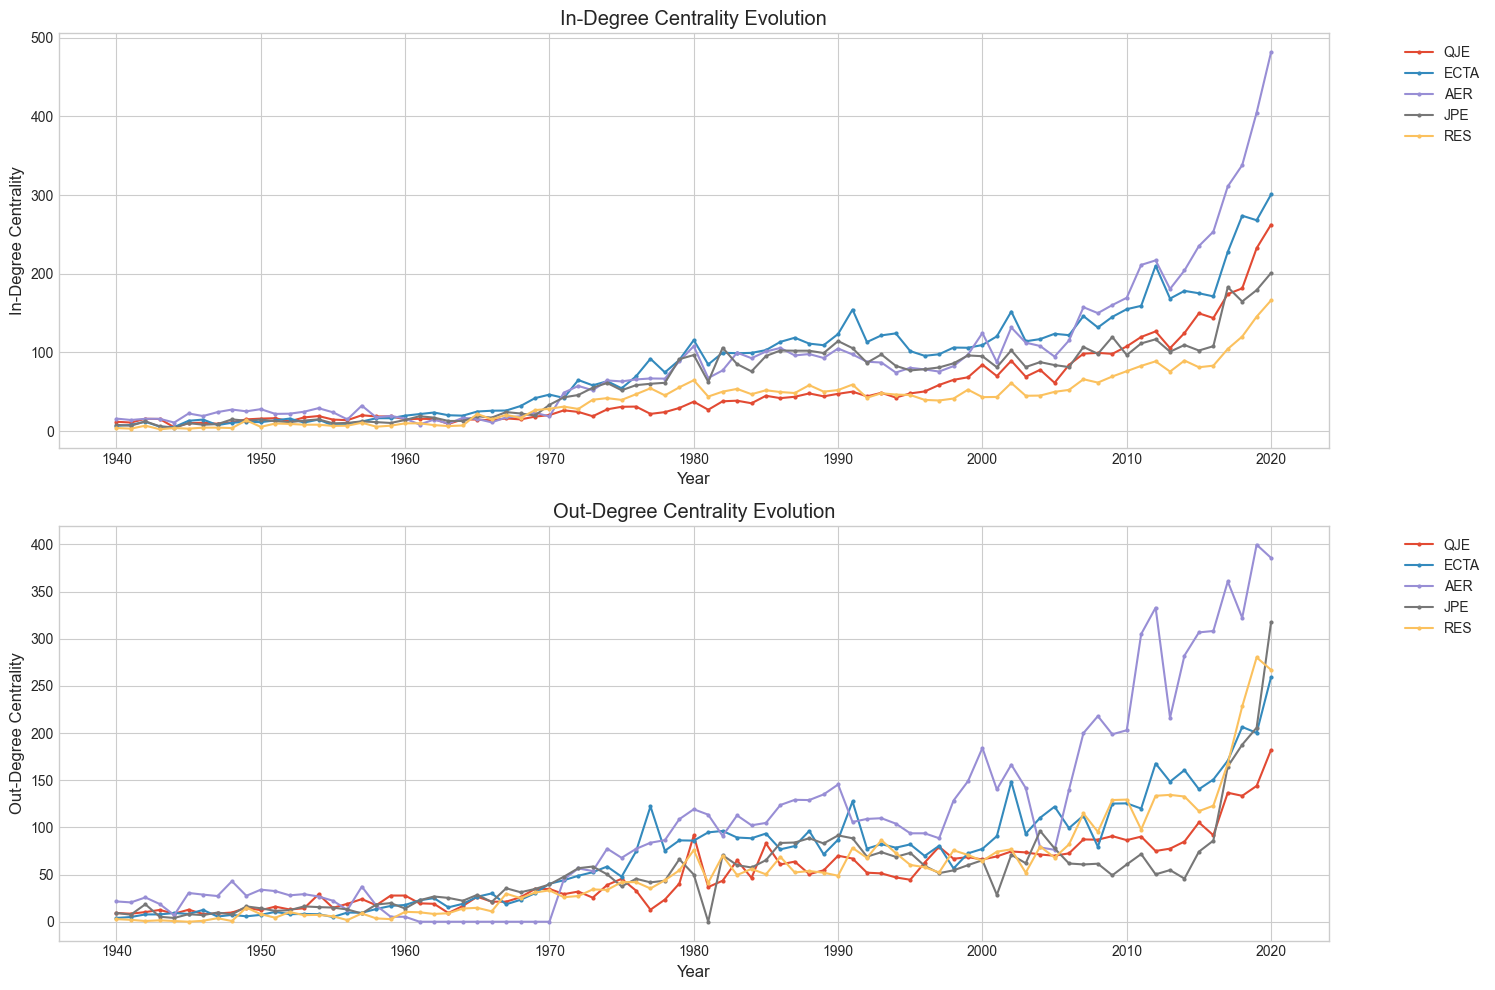

<Figure size 1500x600 with 0 Axes>

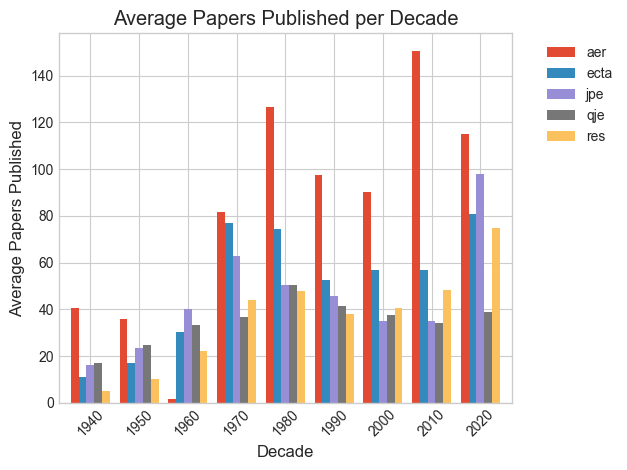

In [42]:
df = pd.concat(m_met_5.values()).reset_index(drop=True)
create_time_series_visualizations(df)

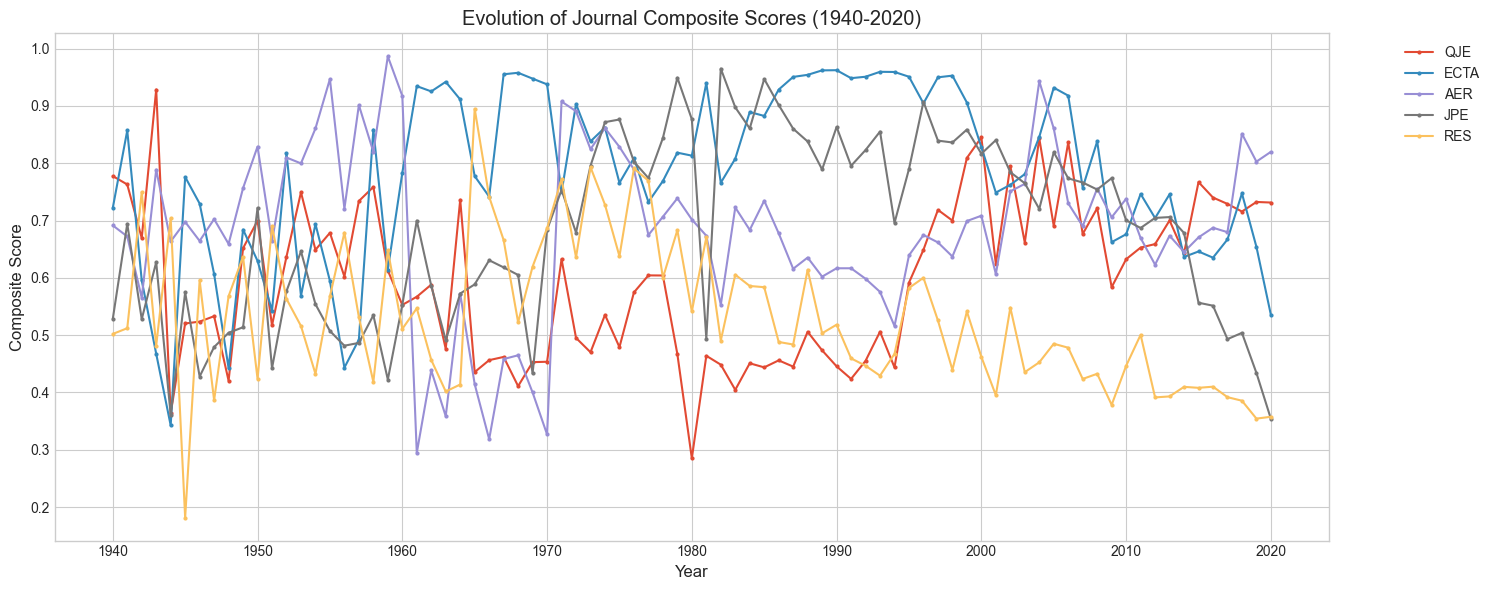

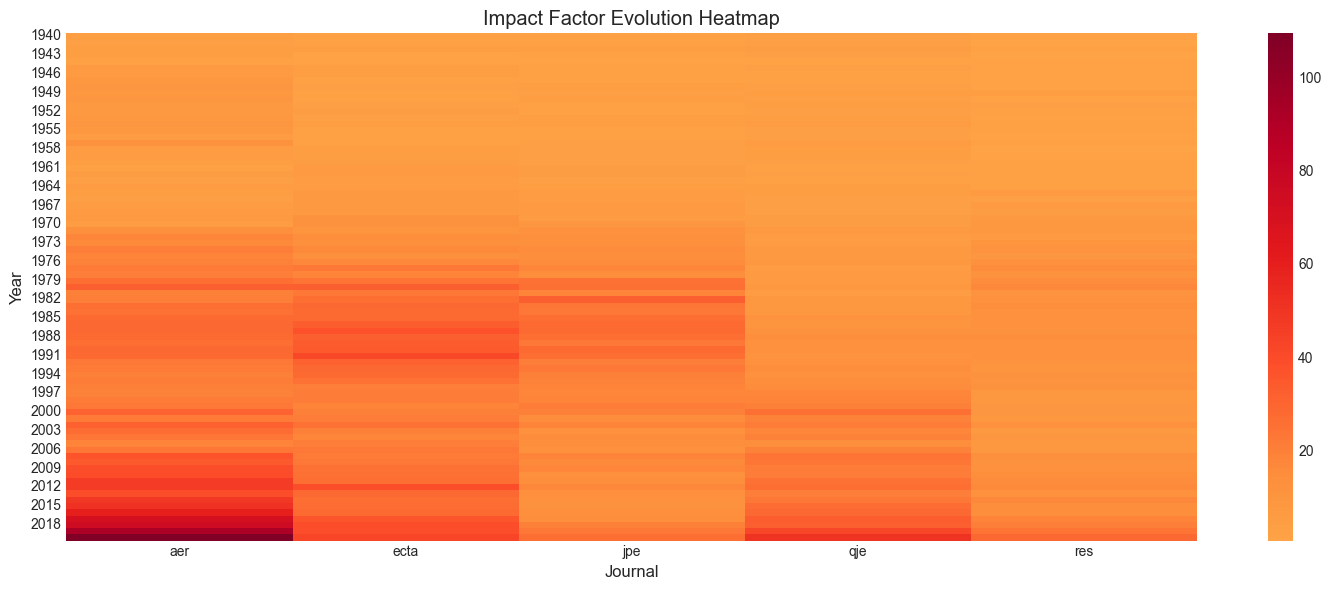

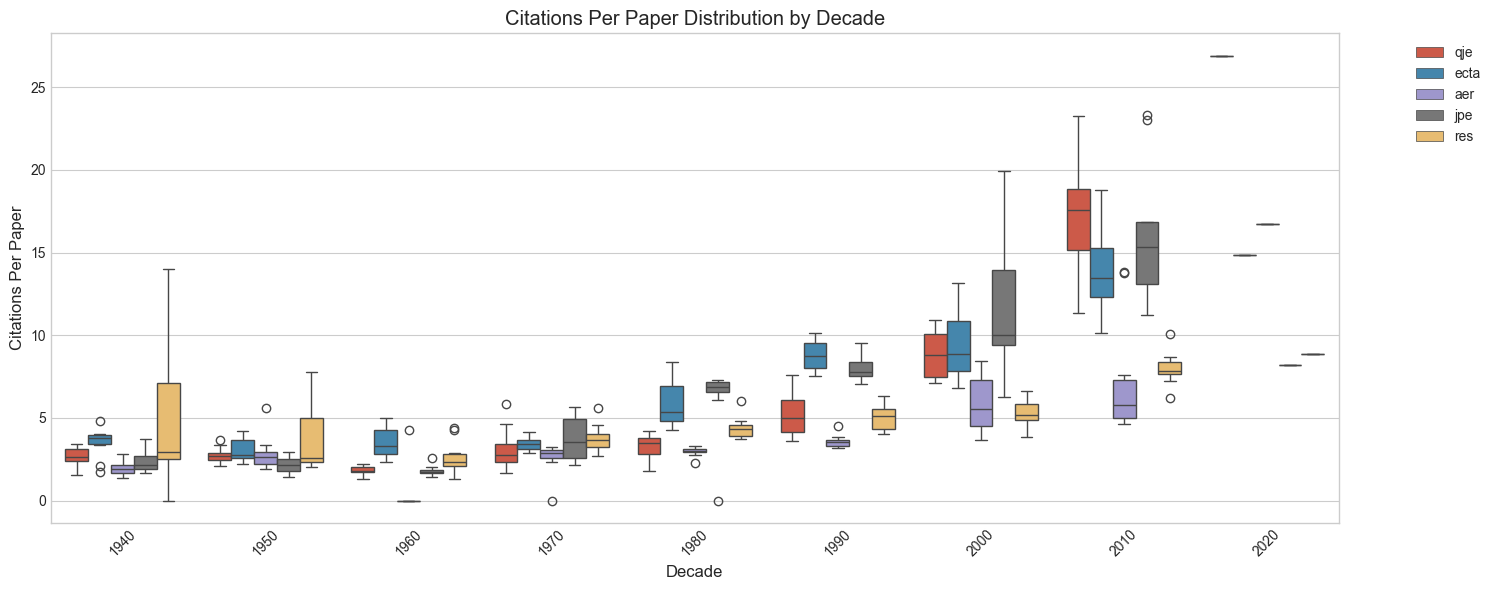

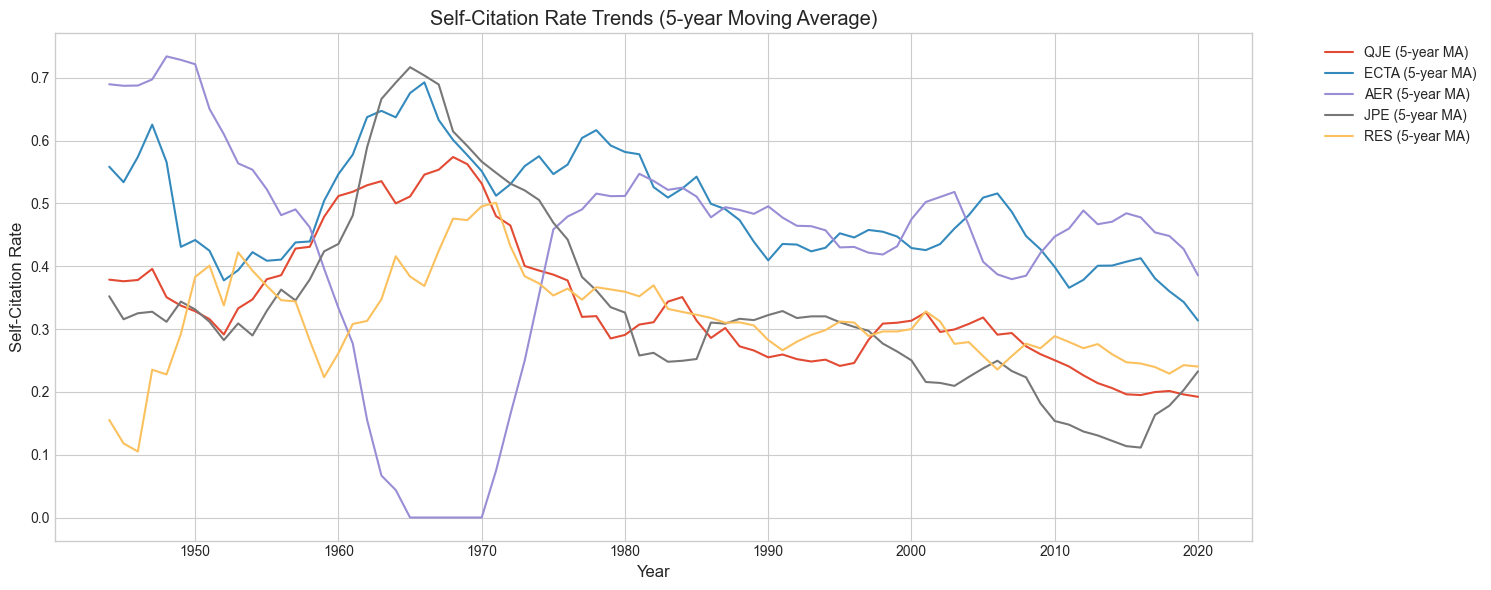

<Figure size 1500x600 with 0 Axes>

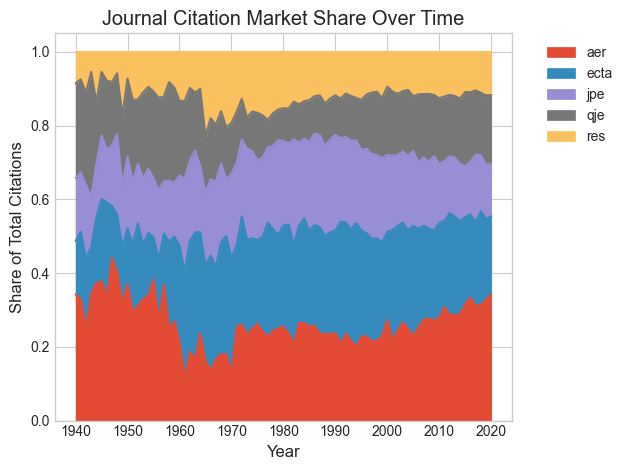

<Figure size 1500x600 with 0 Axes>

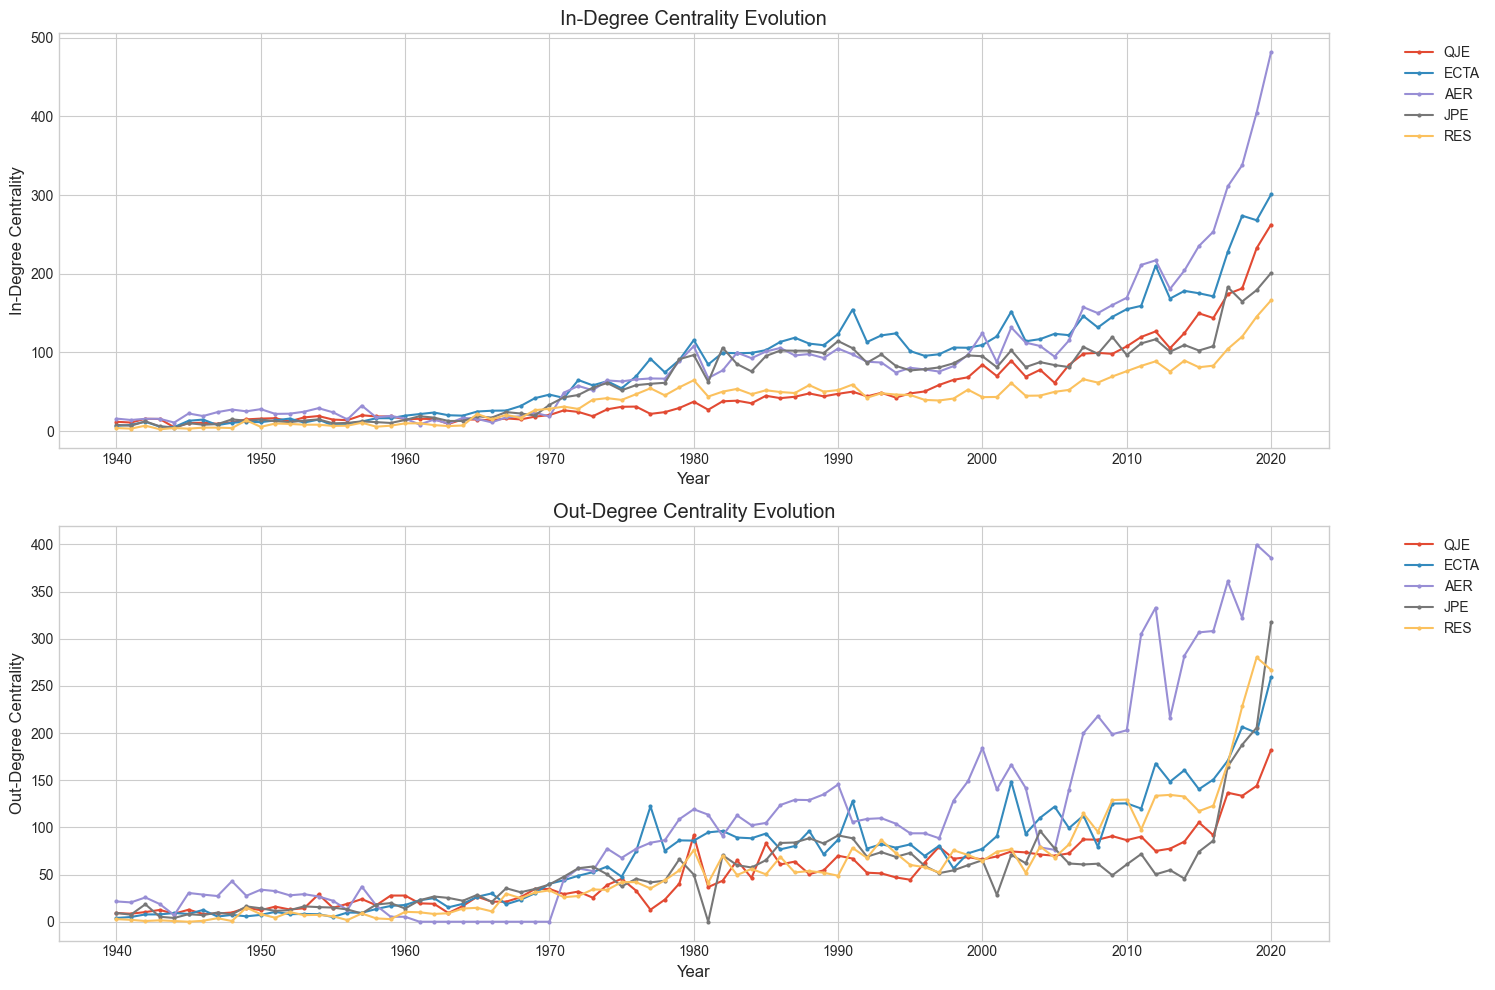

<Figure size 1500x600 with 0 Axes>

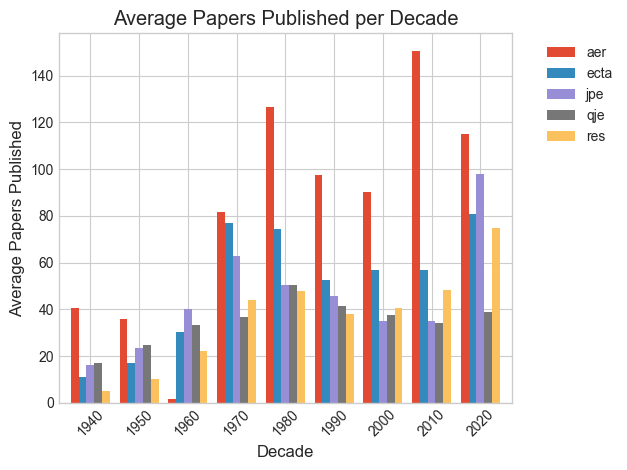

In [41]:
df = pd.concat(m_met_10.values()).reset_index(drop=True)
create_time_series_visualizations(df)

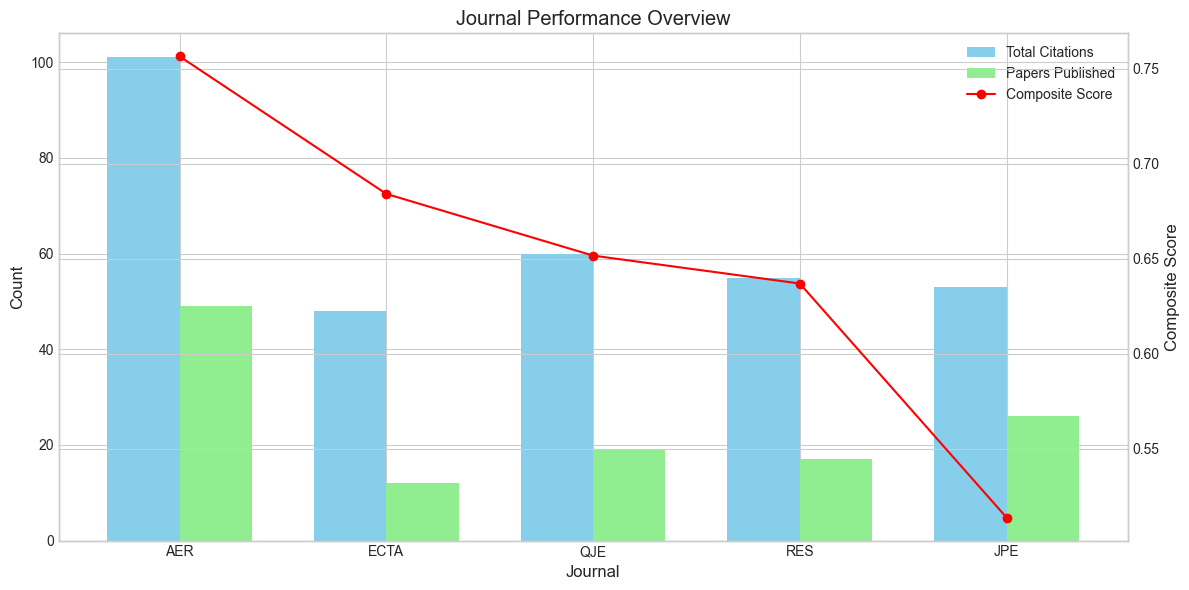

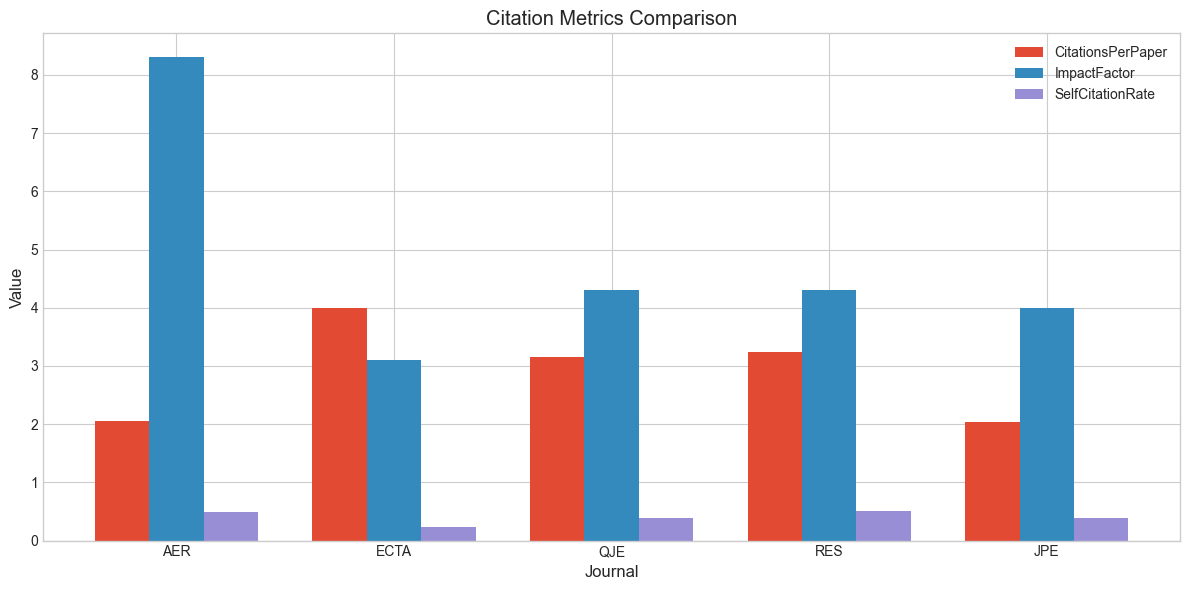

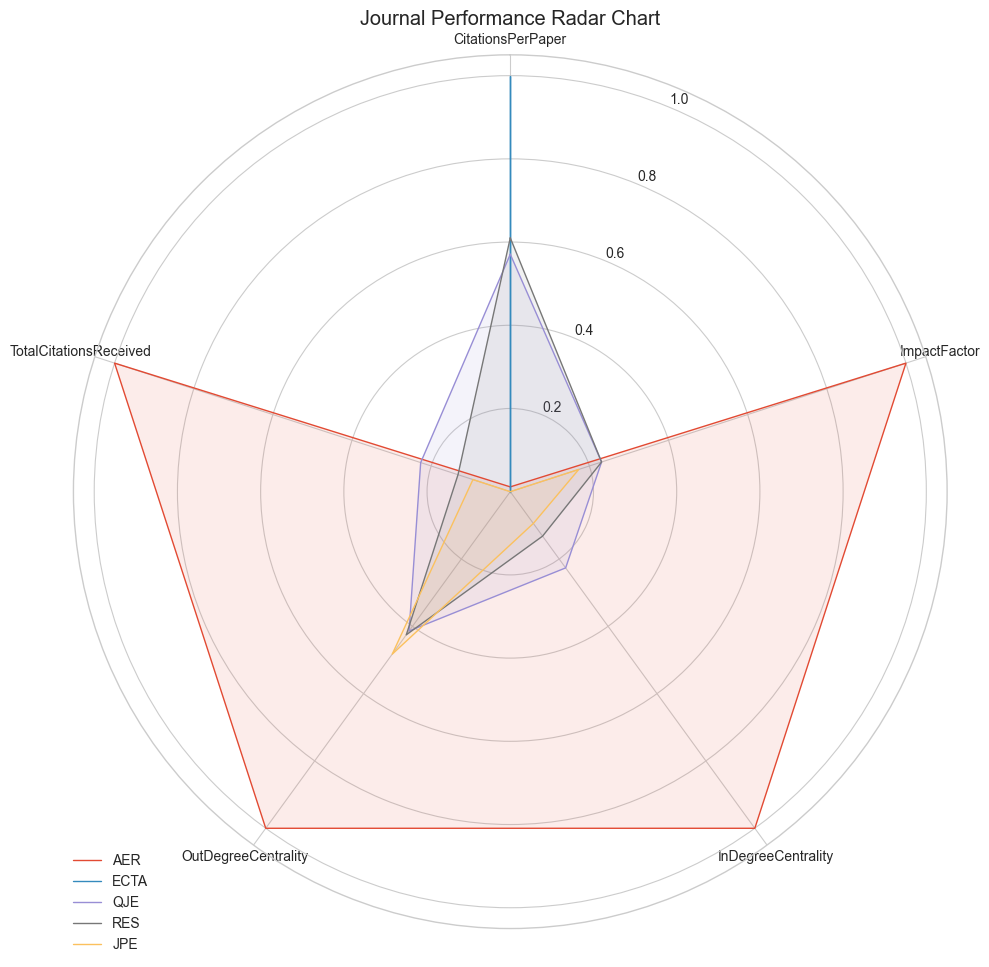

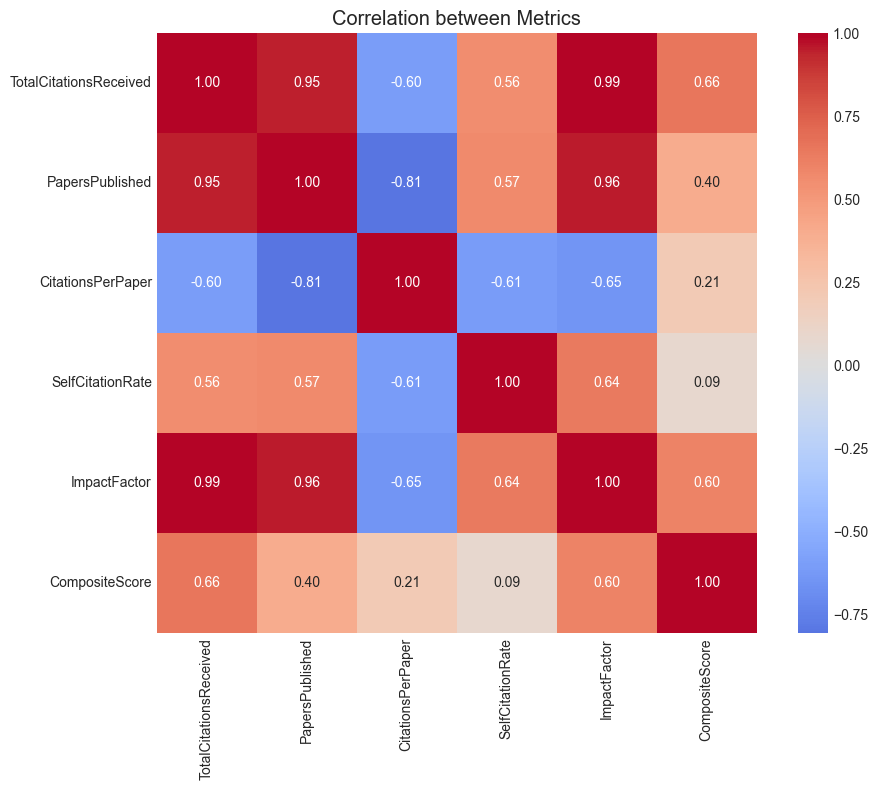

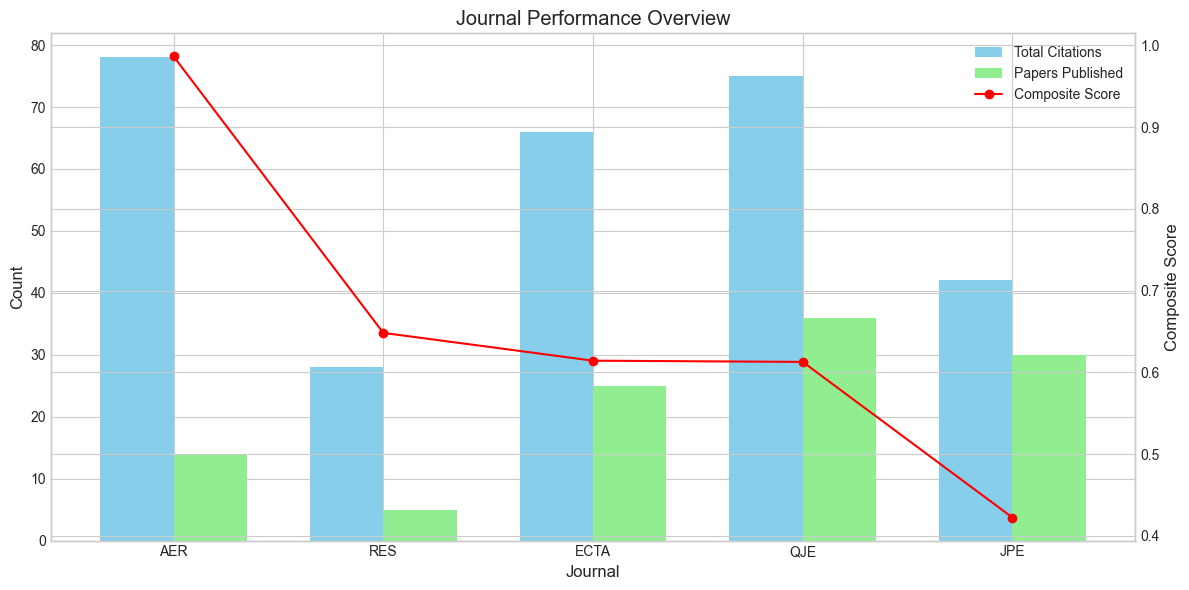

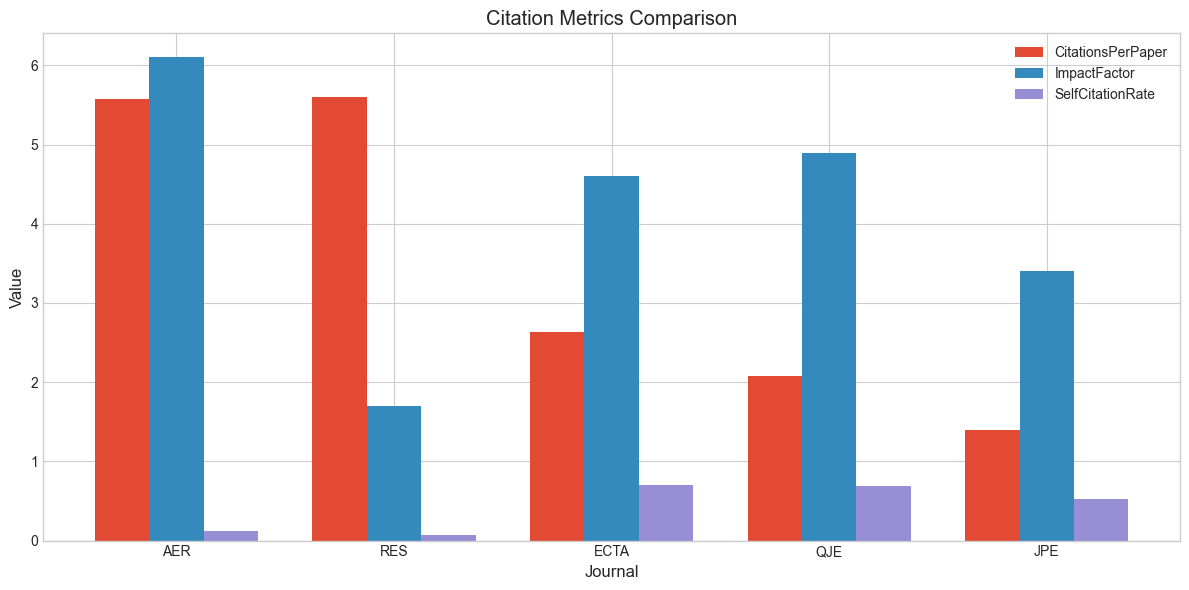

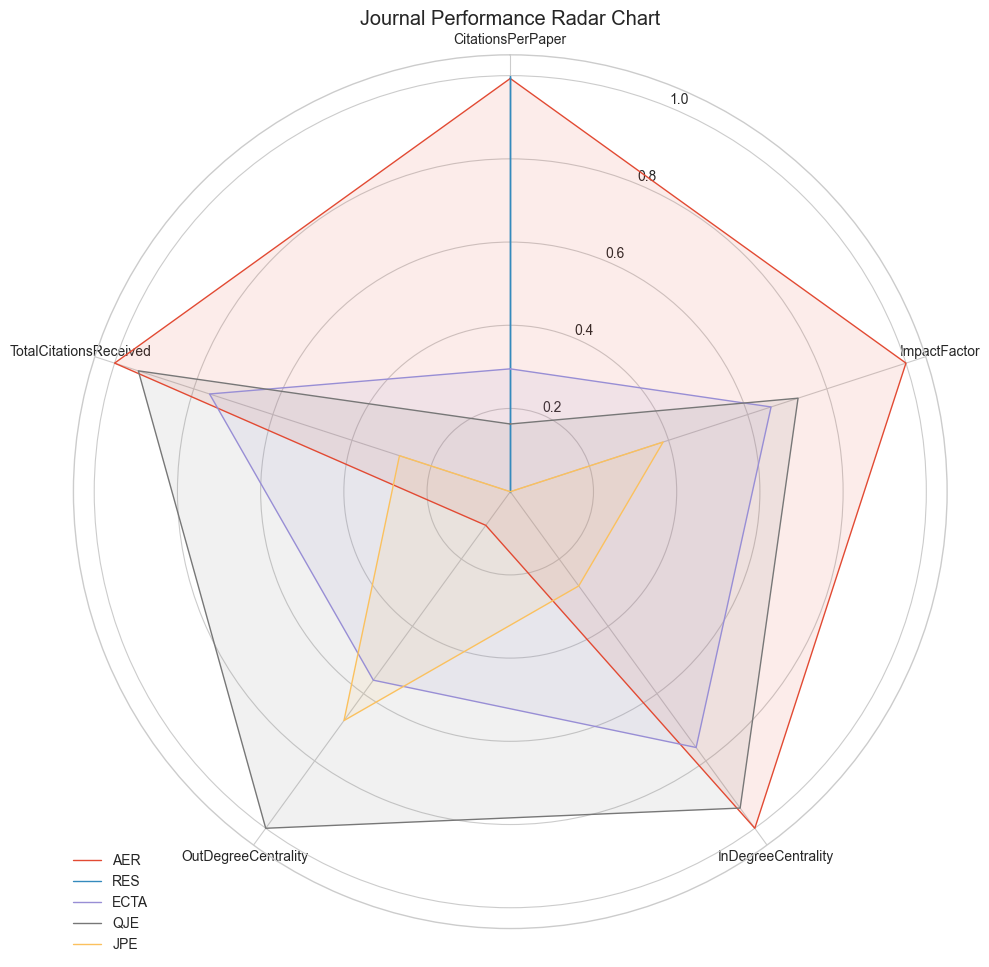

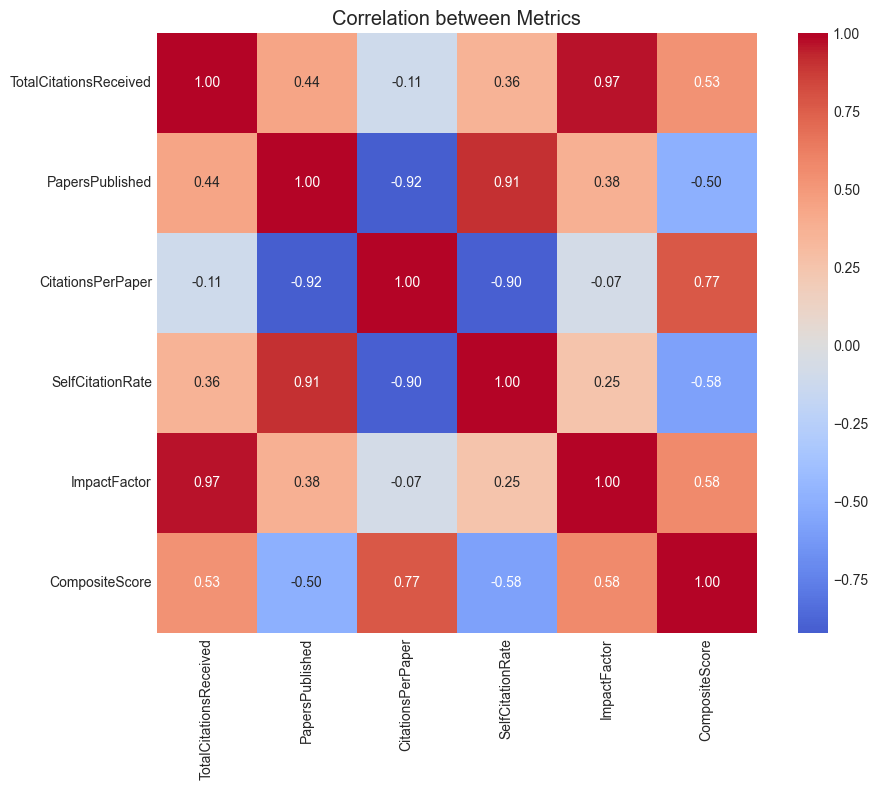

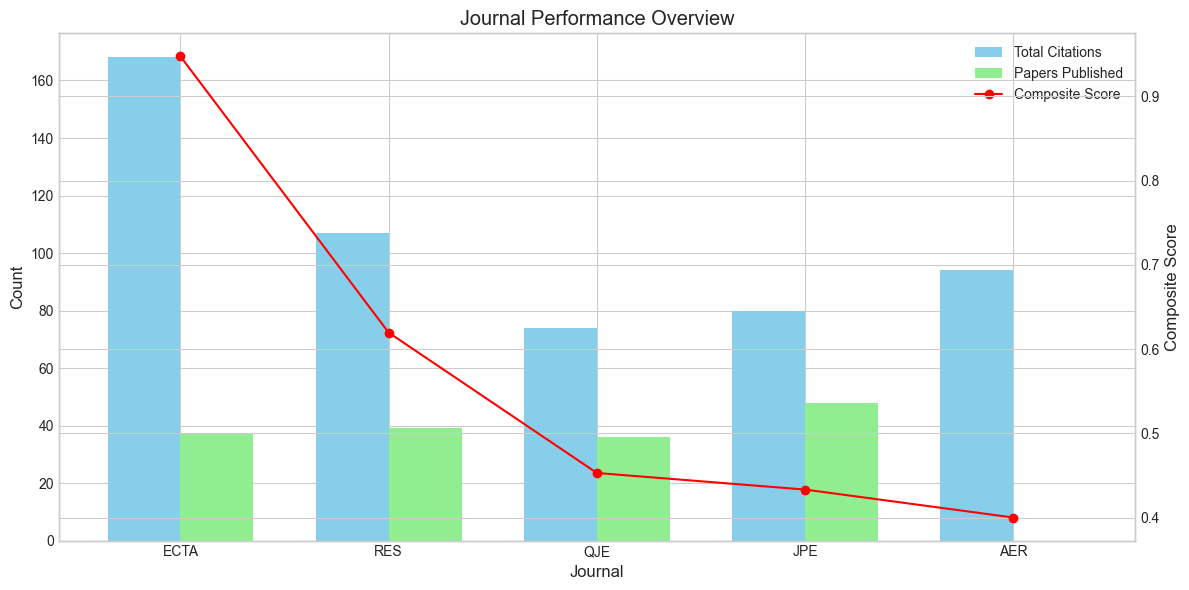

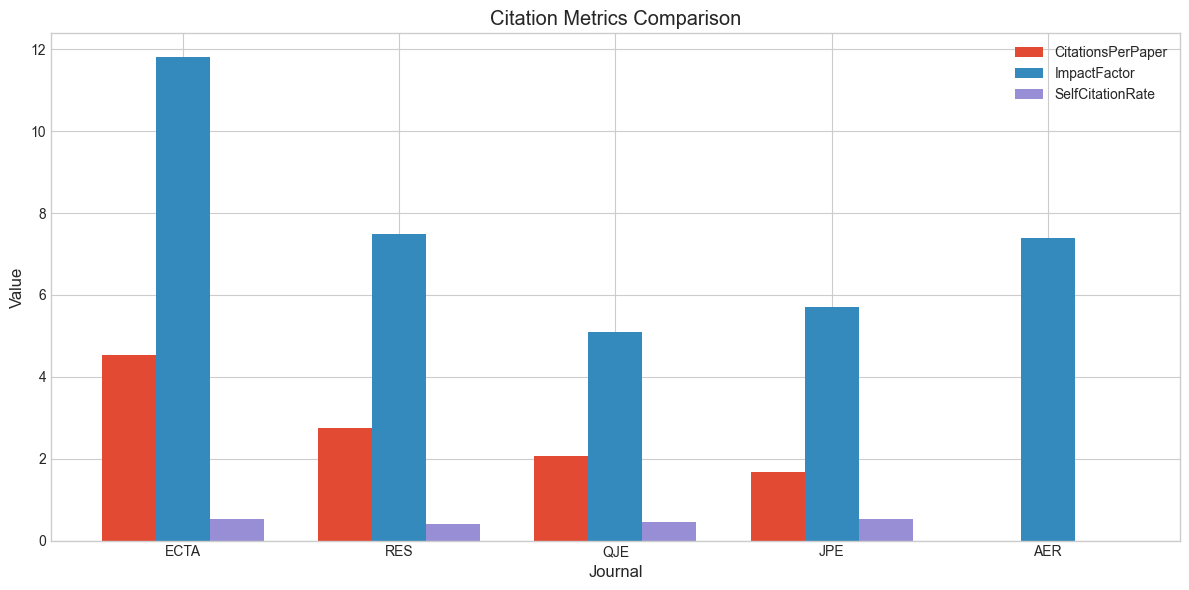

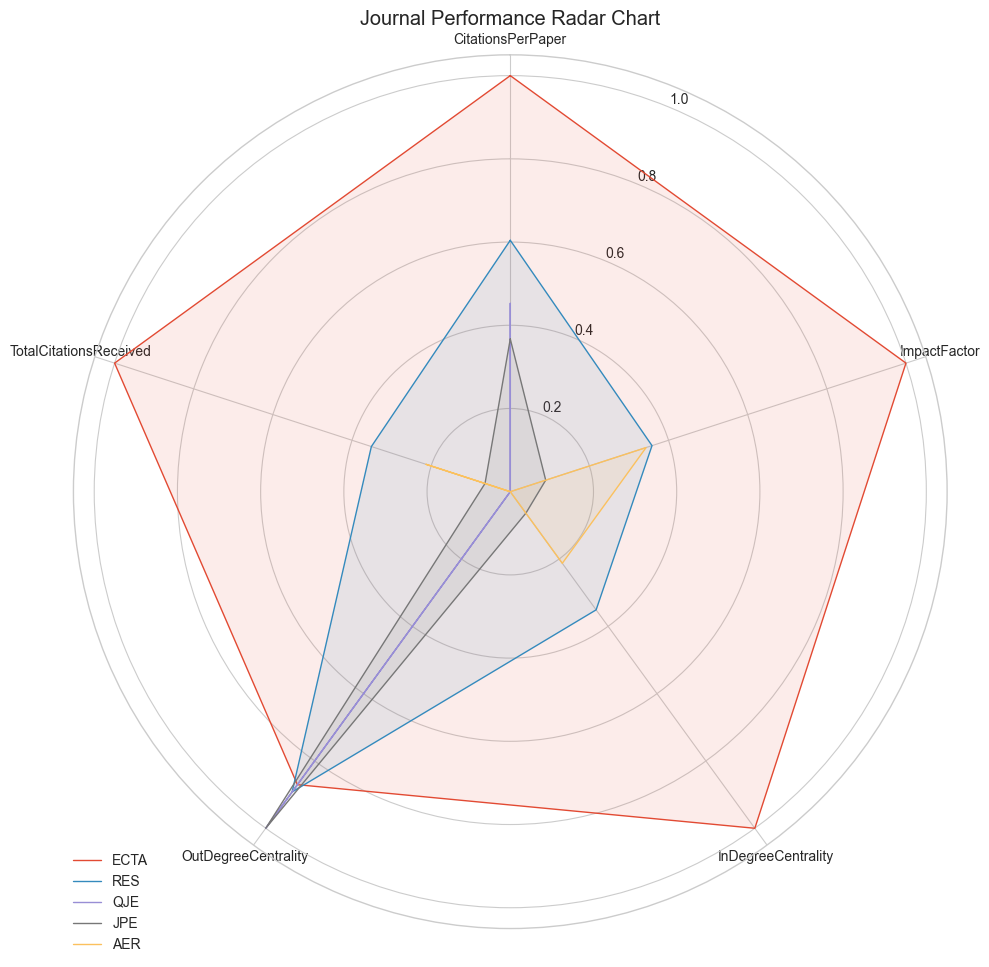

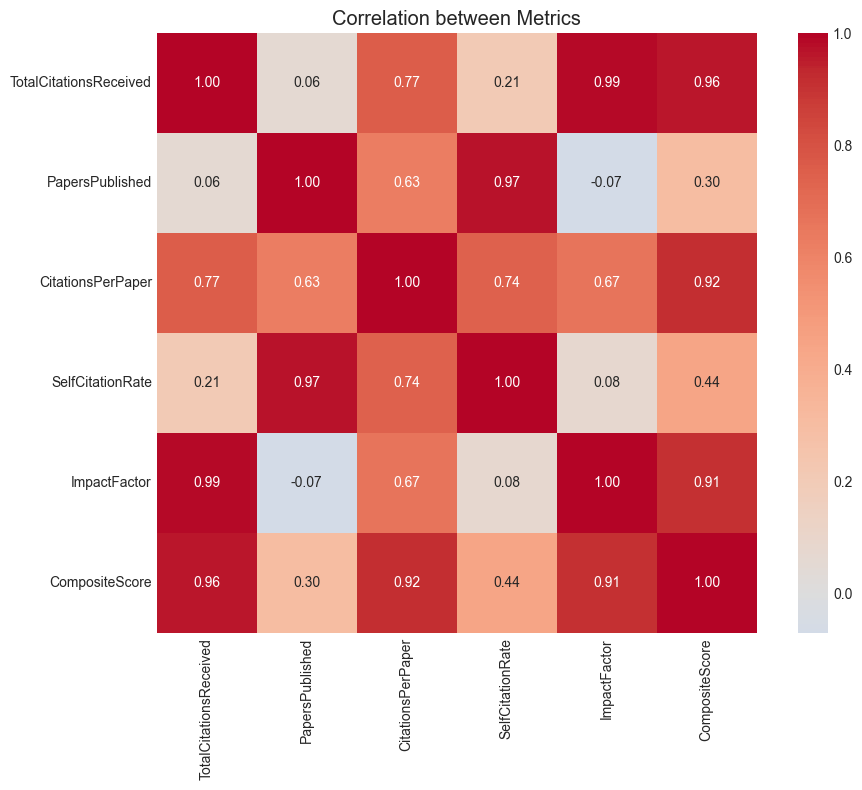

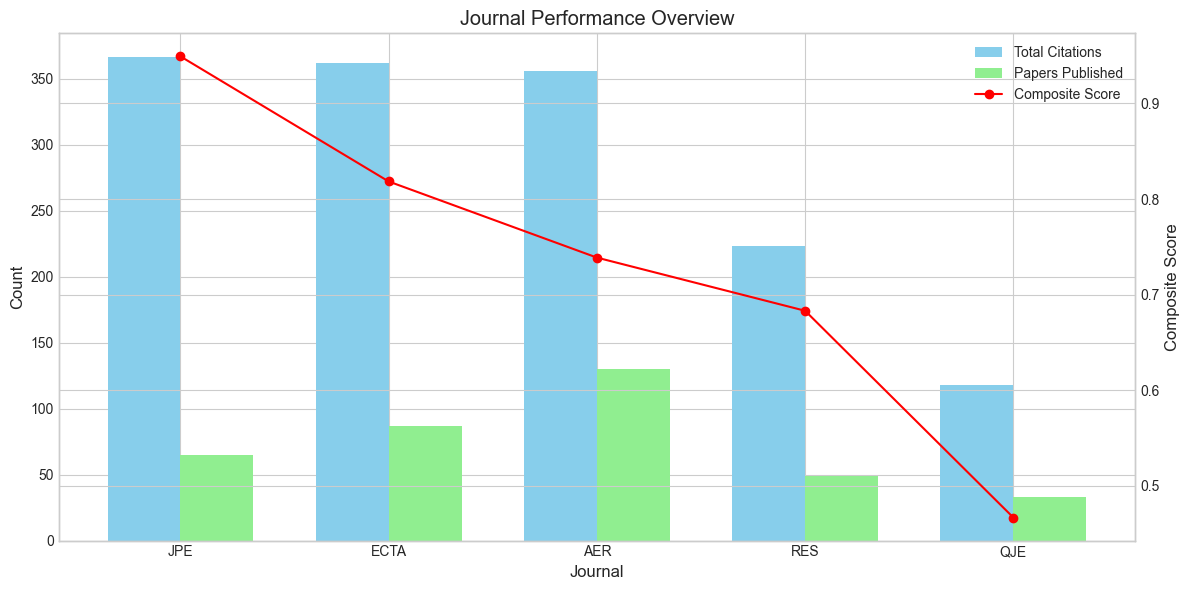

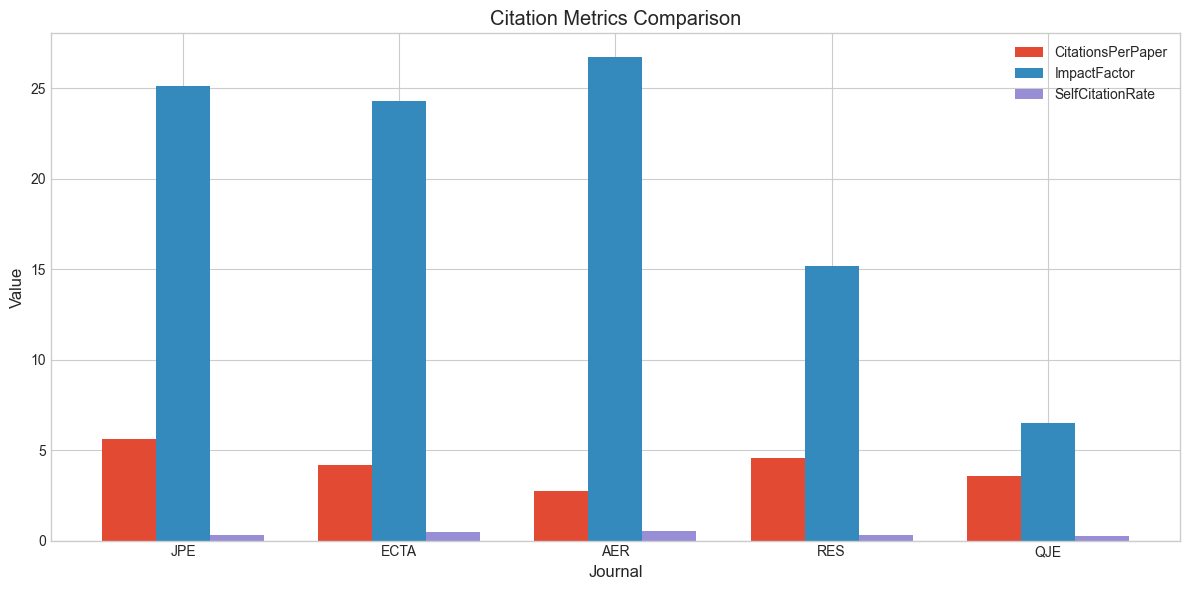

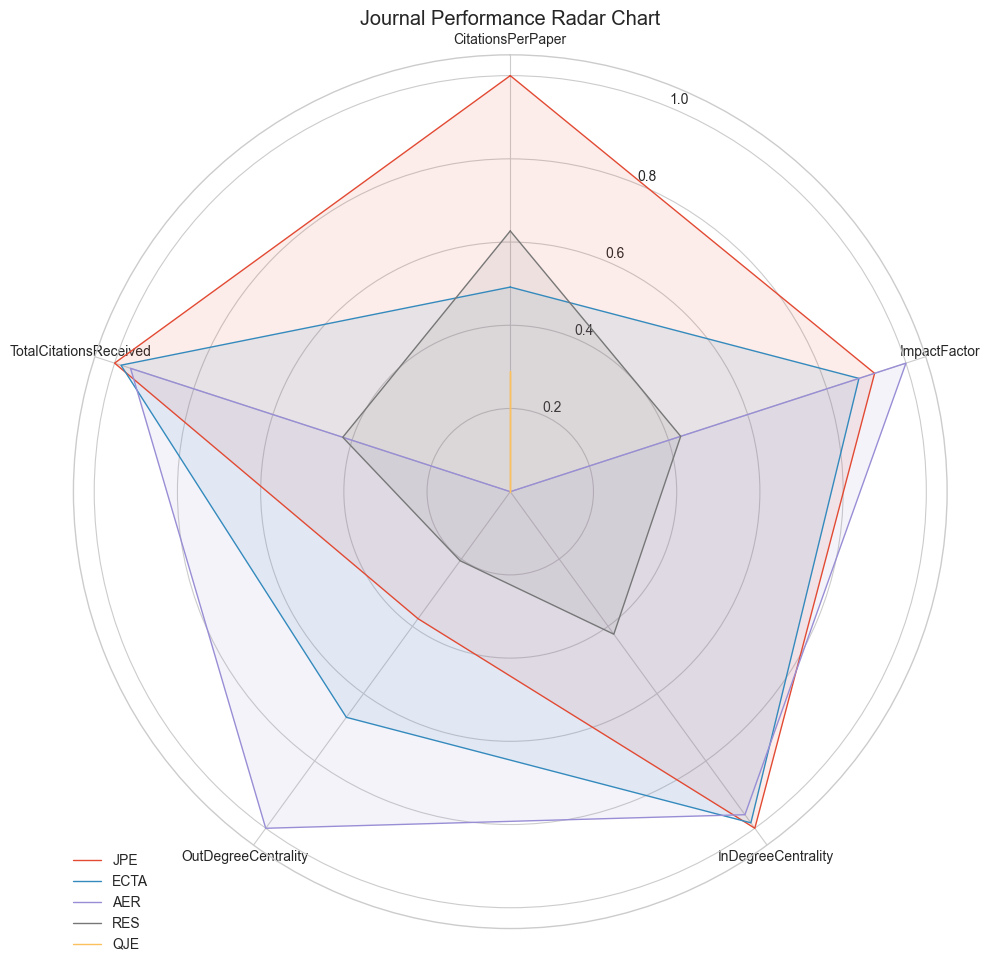

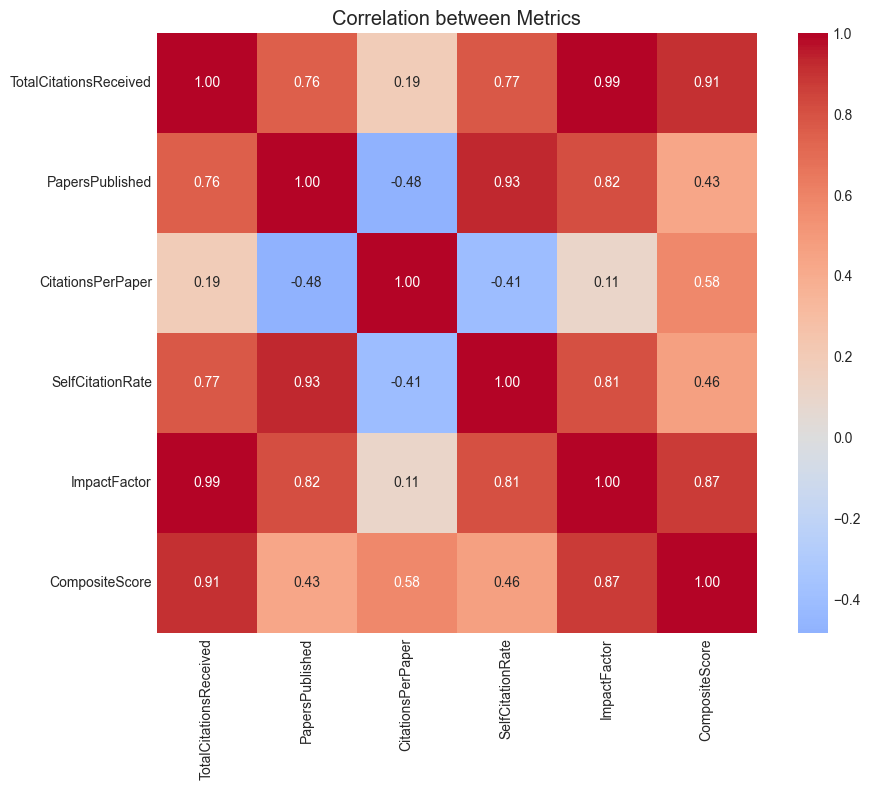

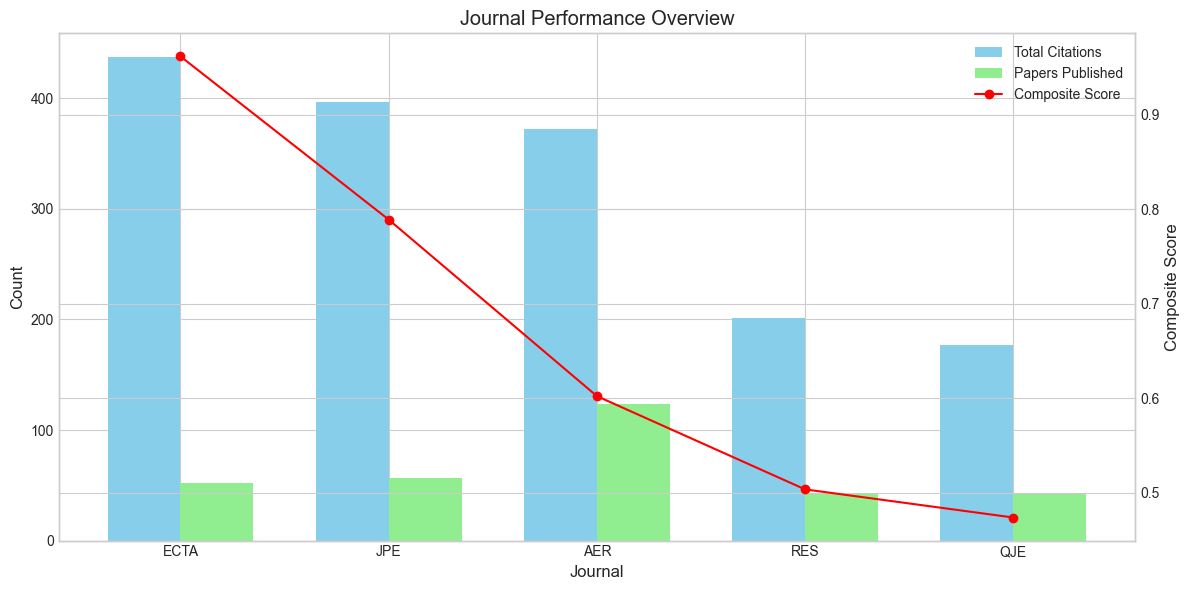

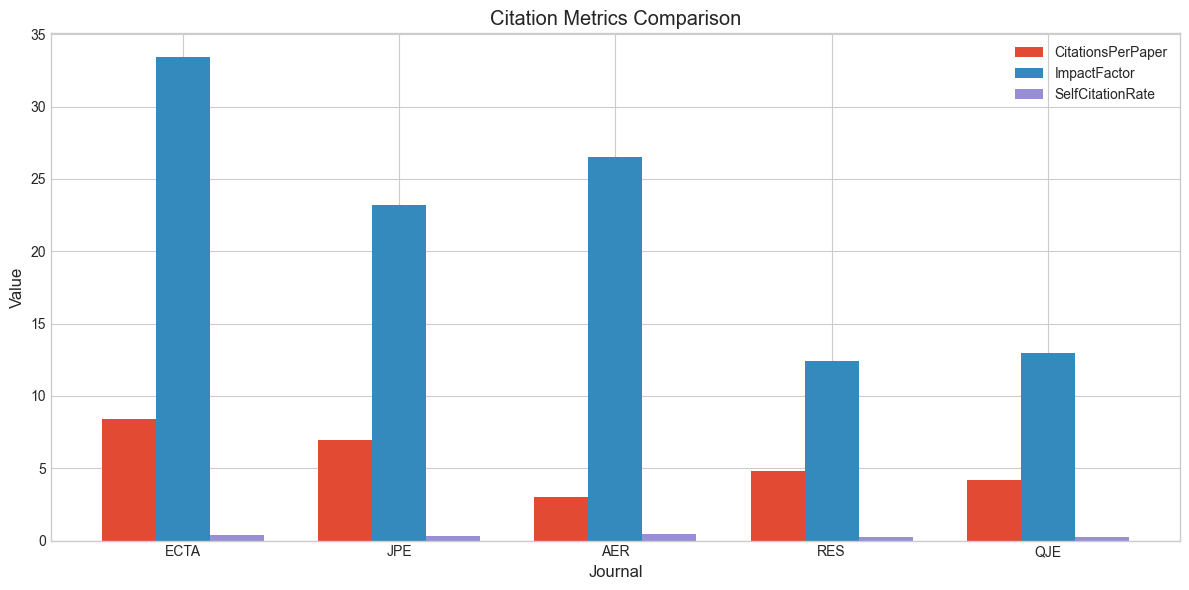

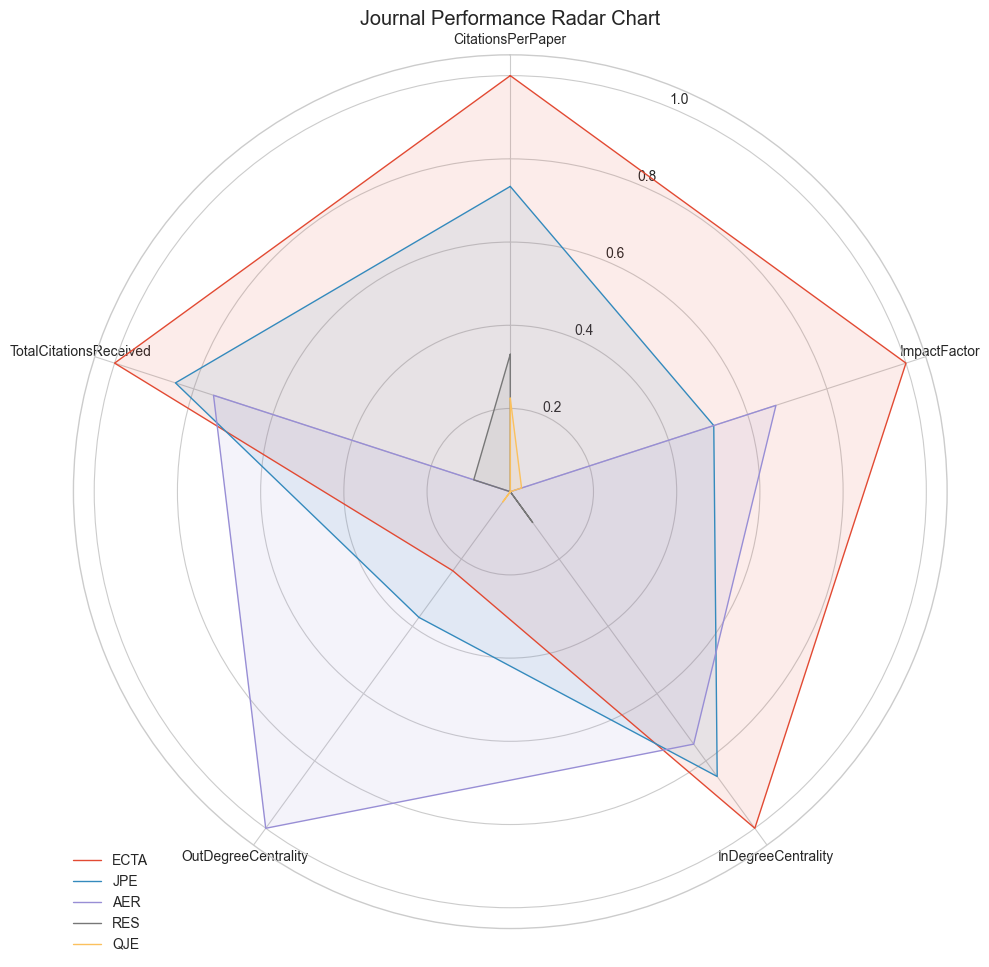

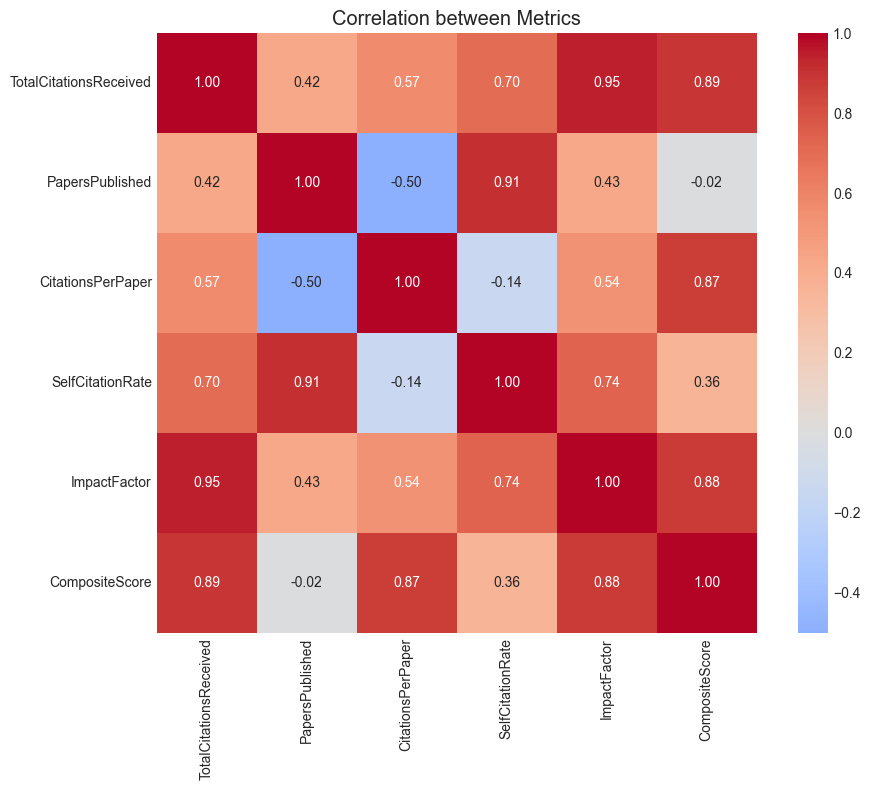

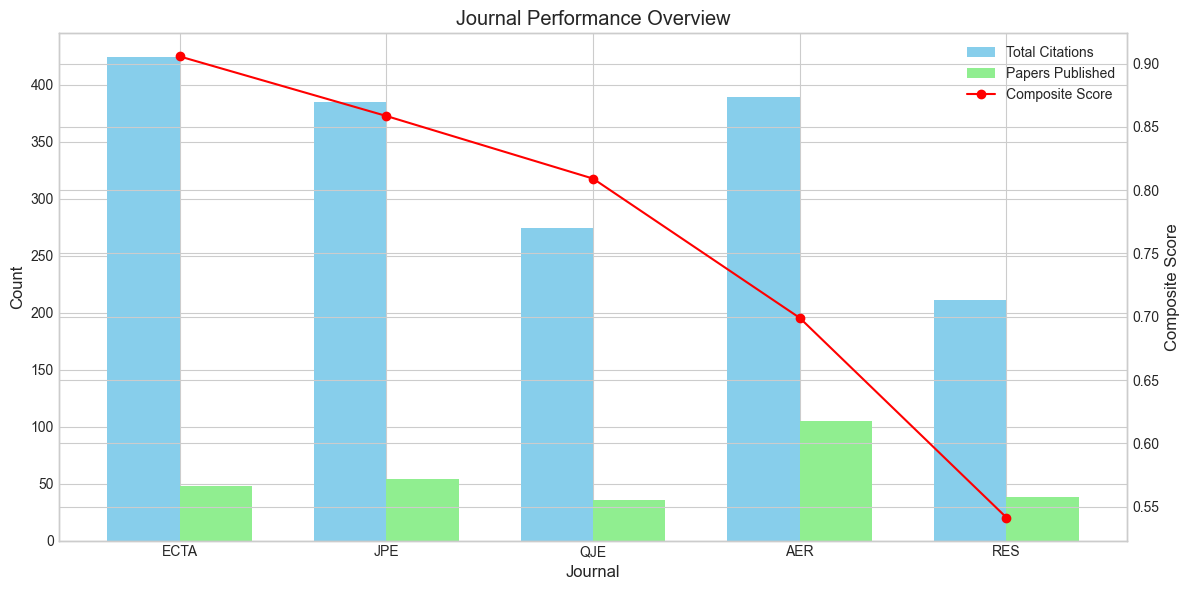

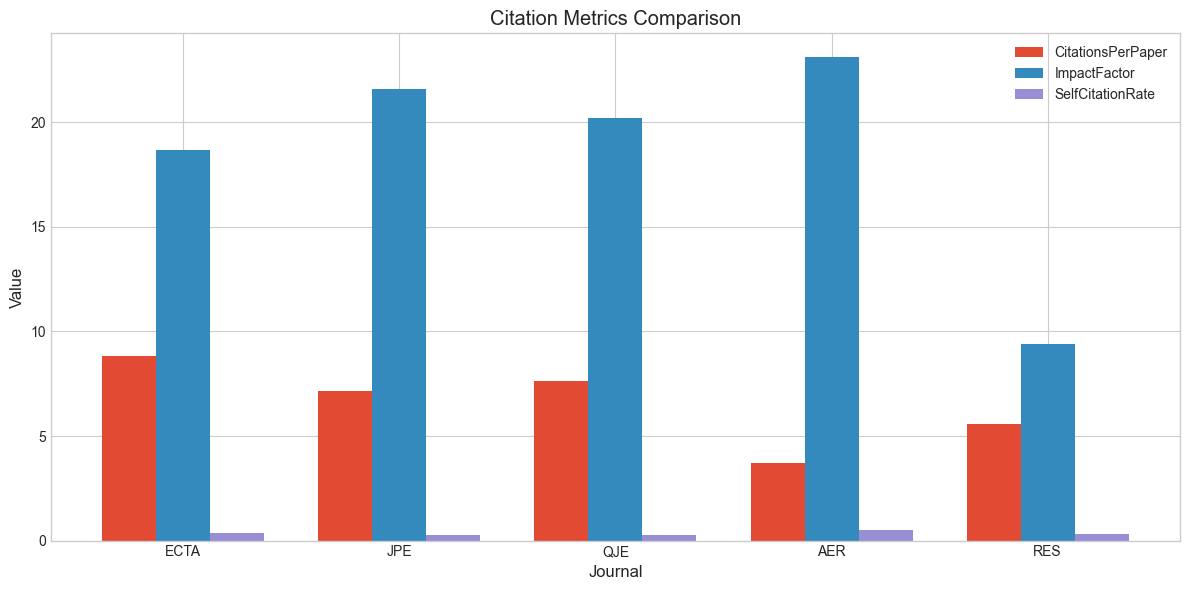

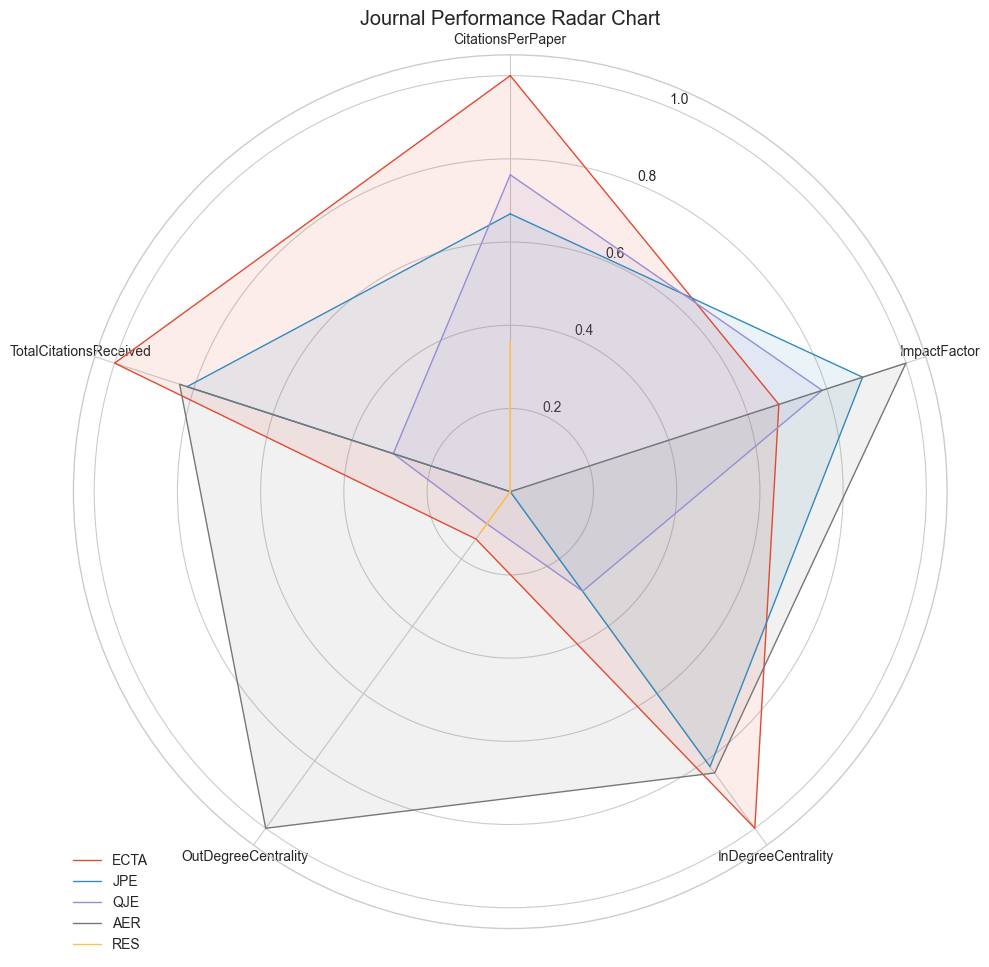

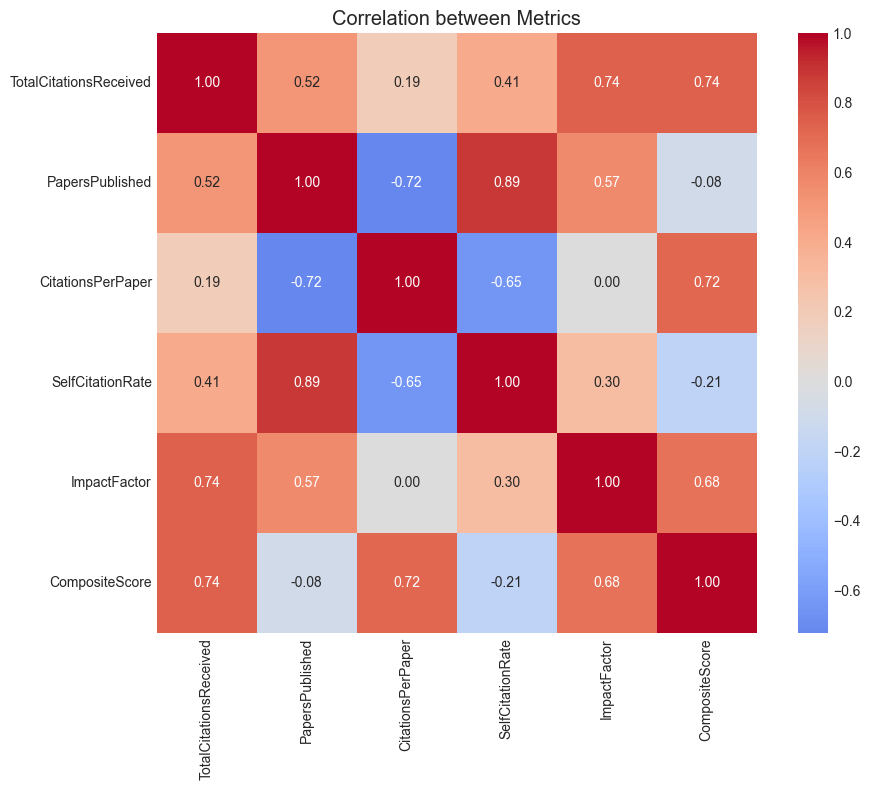

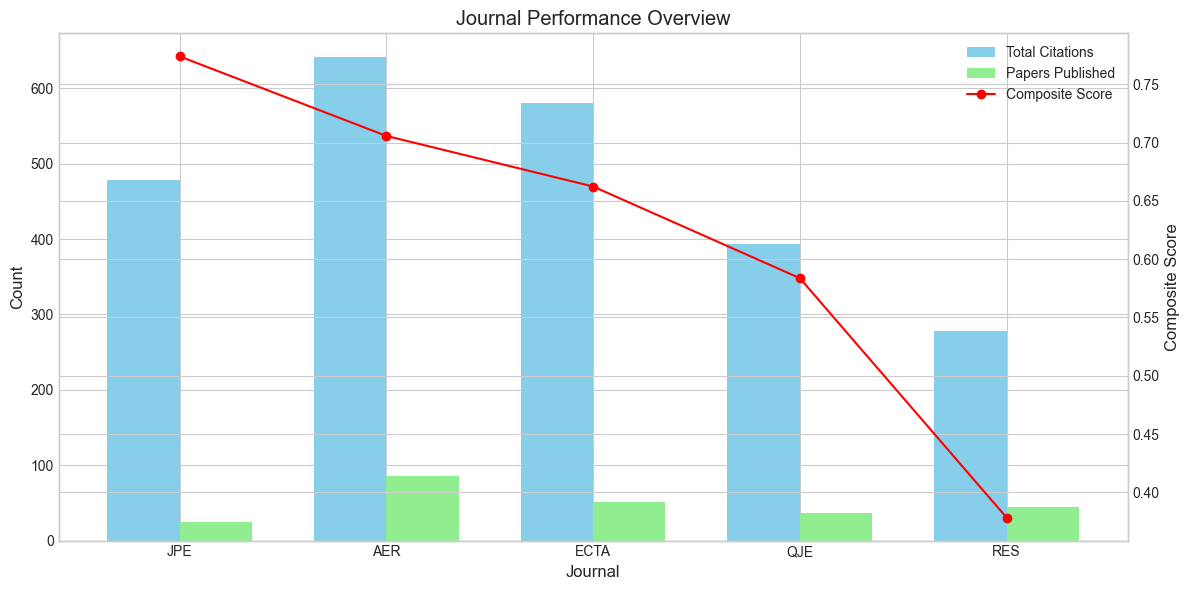

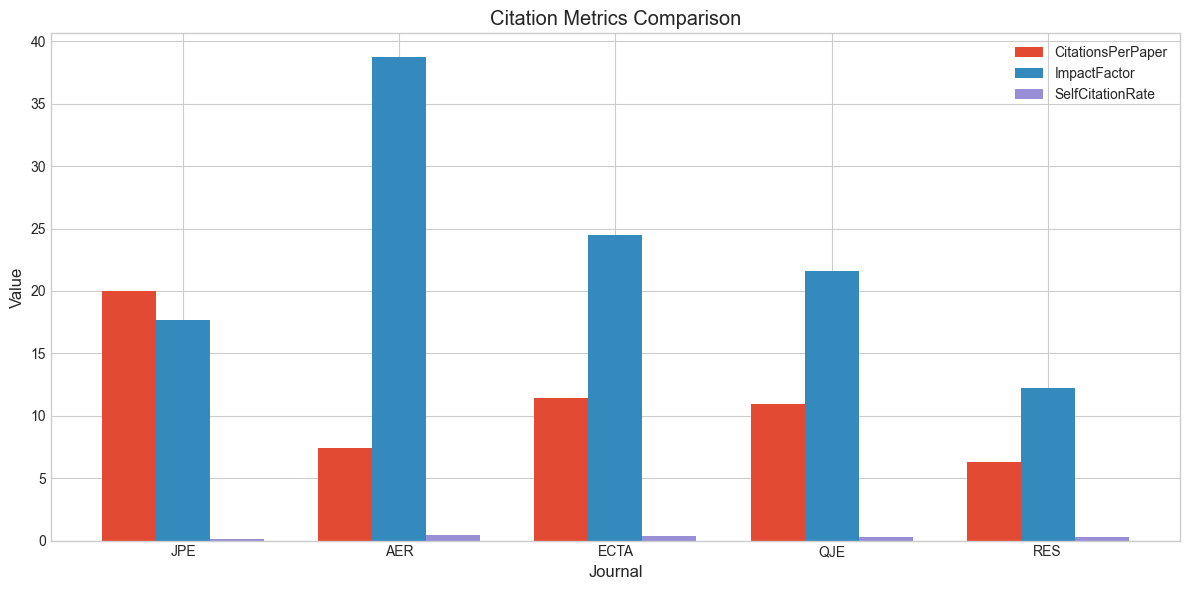

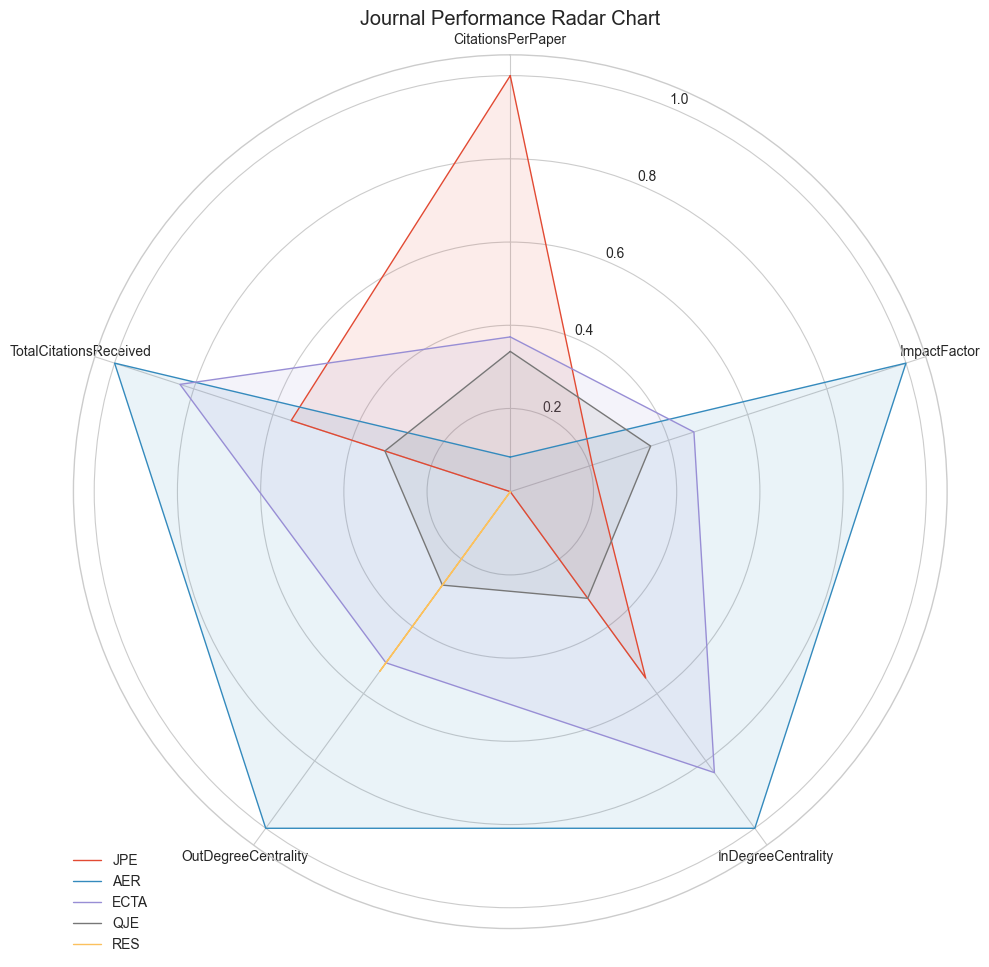

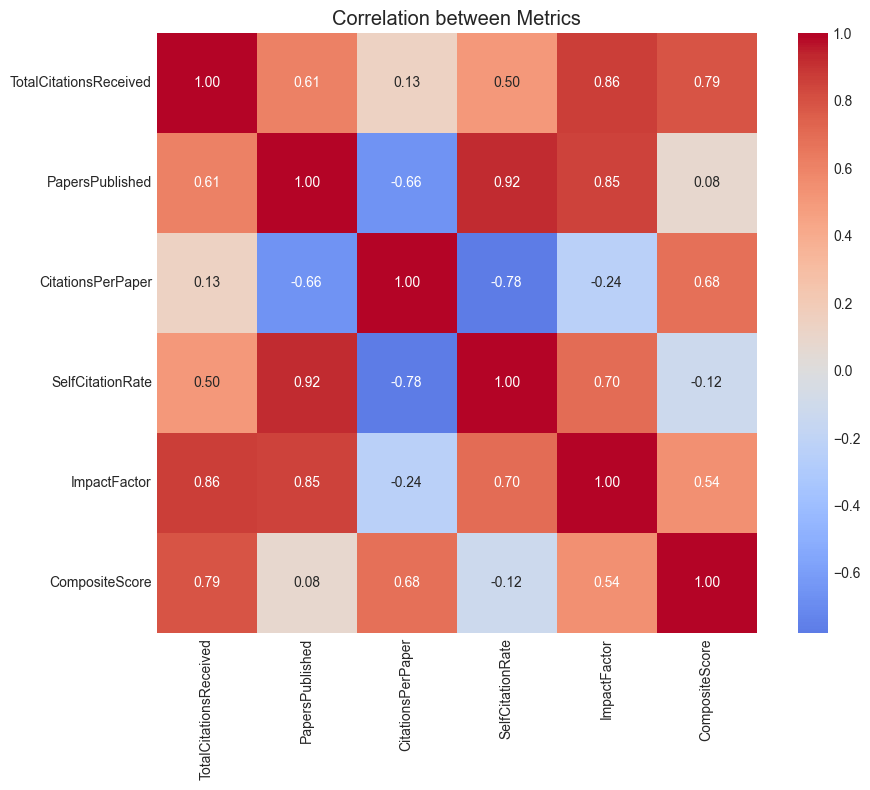

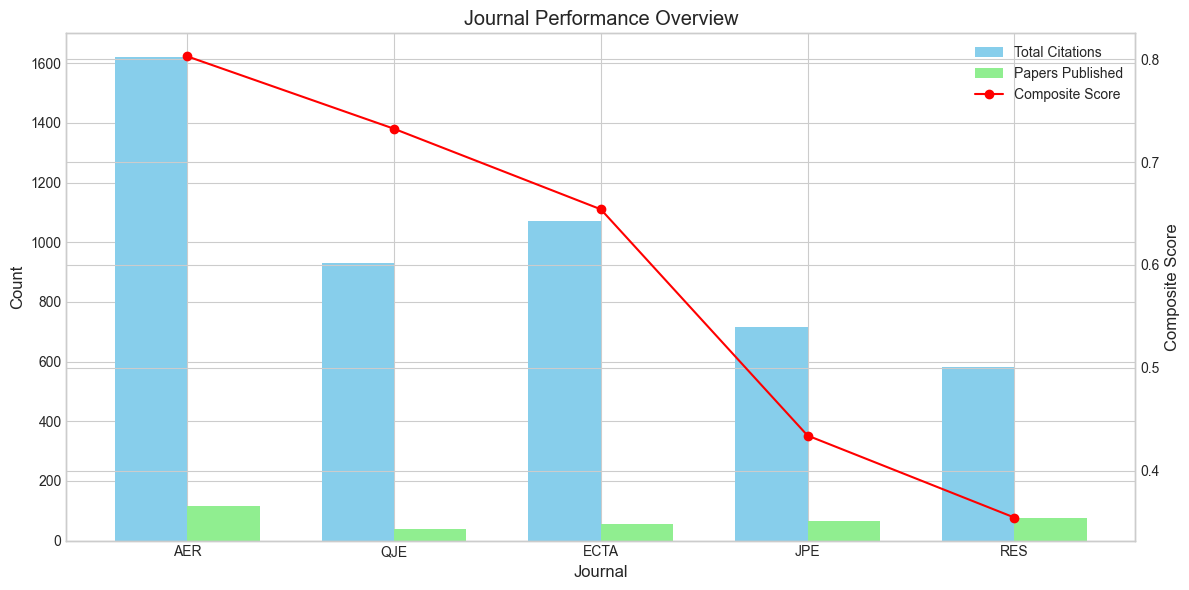

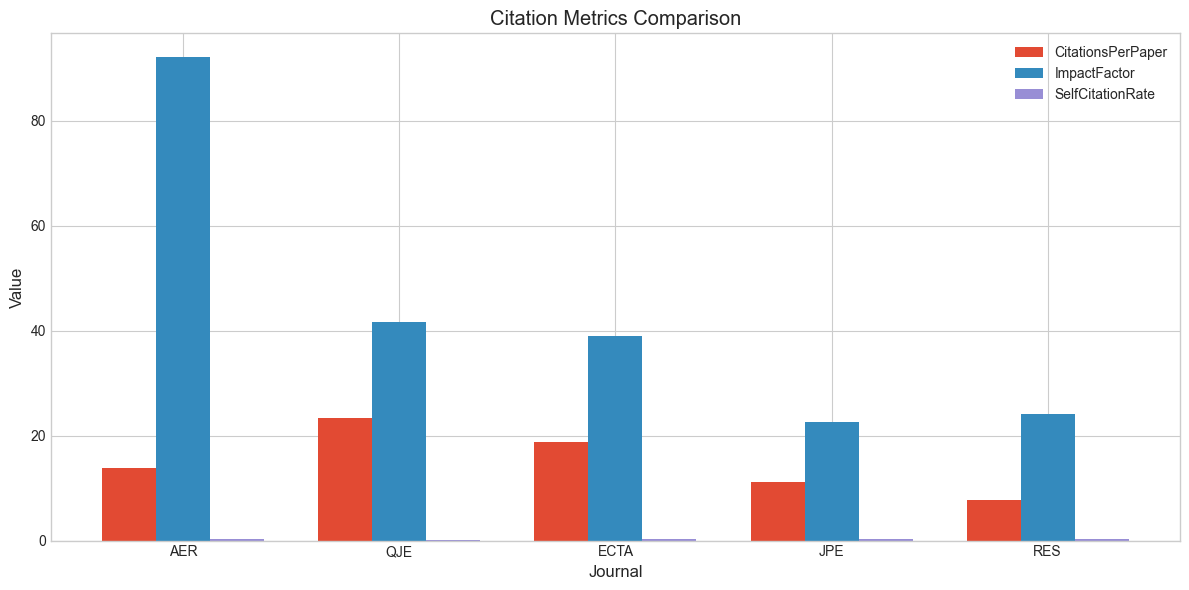

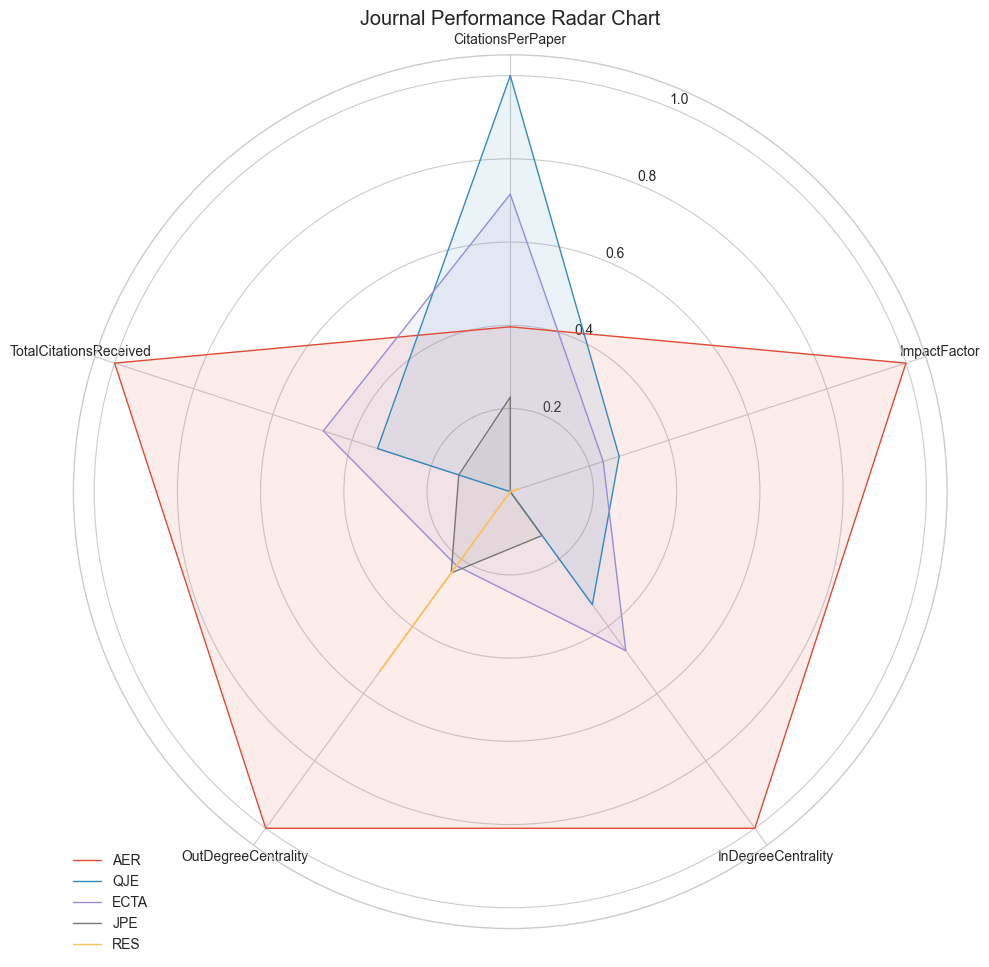

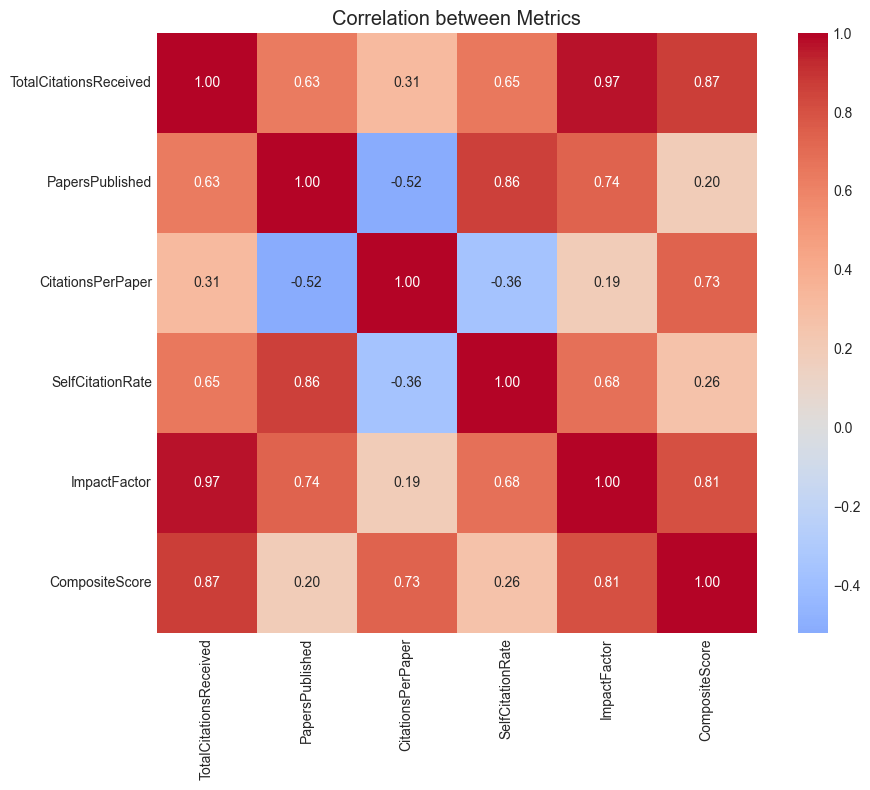

In [45]:
for i in range(1949,2020,10):
    create_journal_visualizations(m_met_10[i])